In [1]:
#!pip install statannotations

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
from scipy.stats import mannwhitneyu

from statannotations.Annotator import Annotator
from scipy.spatial.distance import pdist, squareform
import ast
from scipy.stats import ttest_ind

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import skimage
#from skimage import data
from skimage import filters
#import scipy
#from scipy import ndimage
#from scipy import misc
#import imageio as io
#import copy
#from skimage import morphology
#from skimage import exposure
#from skimage.morphology import erosion, dilation, opening
import czifile as cz
#import warnings
#from IPython.display import Image
#import random
#from tqdm.notebook import tqdm

#import imutils
import cv2
#from scipy import signal

#import pickle
#from skimage import img_as_ubyte
import pandas as pd
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat,disk)
import copy

import seaborn as sns

In [4]:

group_ID = {11: ('No Treatment', 'UF'), 
            9: ('No Treatment', 'DF'), 
            10: ('No Treatment', 'Static'), 
            5: ('Heparin 2 UmL', 'UF'), 
            4: ('Heparin 2 UmL', 'Static'), 
            3: ('Heparin 2 UmL', 'DF'), 
            1: ('Albumin bound S1P', 'Static'), 
            2: ('Albumin bound S1P', 'UF'), 
            0: ('Albumin bound S1P', 'DF'), 
            8: ('Heparin S1P', 'UF'), 
            6: ('Heparin S1P', 'DF'), 
            7: ('Heparin S1P', 'Static')}

names_order = ['No Treatment-Static',
               'Heparin 2 UmL-Static',
 'Albumin bound S1P-Static',
 'Heparin S1P-Static',
               'No Treatment-DF',
 'Heparin 2 UmL-DF',
 'Albumin bound S1P-DF',
 'Heparin S1P-DF',
               'No Treatment-UF',
 'Heparin 2 UmL-UF',
 'Albumin bound S1P-UF',
 'Heparin S1P-UF']

names_simp = ['No Treatment - Static',
    'Heparin - Static',
 'S1P-Static',
 'Co-Treatment - Static',
              'No Treatment - DF',
 'Heparin - DF',
 'S1P - DF',
 'Co-Treatment - DF',
              'No Treatment - UF',
 'Heparin - UF',
 'S1P - UF',
 'Co-Treatment - UF']

In [4]:
# group_ID = {5: ('Heparin 2 UmL', 'UF'), 4: ('Heparin 2 UmL', 'Static'), 3: ('Heparin 2 UmL', 'DF'), 1: ('Albumin bound S1P', 'Static'), 2: ('Albumin bound S1P', 'UF'), 0: ('Albumin bound S1P', 'DF'), 8: ('Heparin S1P', 'UF'), 6: ('Heparin S1P', 'DF'), 7: ('Heparin S1P', 'Static')}
# group_ID


In [5]:
master_df = pd.read_csv('Ron_Cell_Alignment_MasterDF_9_20_23.csv',index_col = 0)
master_df

,exp_num,file_name,data_path,treatment,flow,time,cell_age,date,group,replicate,...,ellipse,center,length,ratio,rot90,elong2,rot90_bar,rot90_bar_all,oop_bar,oop_zero
0,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,"((223.56651306152344, 8.397920608520508), (11....","(223.56651306152344, 8.397920608520508)",12.488817,1.061339,82,False,-2.143190,-1.257434,-0.979175,-0.961262
1,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,"((314.193115234375, 7.629621505737305), (11.64...","(314.193115234375, 7.629621505737305)",35.056408,3.009146,-2,True,-2.143190,-1.257434,0.999988,0.997564
2,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,"((399.5618591308594, 14.099471092224121), (14....","(399.5618591308594, 14.099471092224121)",34.899681,2.352660,-20,True,-2.143190,-1.257434,0.811945,0.766044
3,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,"((1163.43115234375, 9.578180313110352), (11.95...","(1163.43115234375, 9.578180313110352)",27.304987,2.283281,-9,True,-2.143190,-1.257434,0.971493,0.951057
4,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,"((650.6412963867188, 10.803470611572266), (9.9...","(650.6412963867188, 10.803470611572266)",13.078526,1.309845,-58,False,-2.143190,-1.257434,-0.369968,-0.438371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75137,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,"((521.1942749023438, 1019.0352783203125), (11....","(521.1942749023438, 1019.0352783203125)",21.475859,1.904399,32,False,-5.759441,-4.543847,0.250061,0.438371
75138,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,"((101.09074401855469, 1022.1510620117188), (9....","(101.09074401855469, 1022.1510620117188)",19.695911,2.006433,72,True,-5.759441,-4.543847,-0.910098,-0.809017
75139,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,"((292.6744079589844, 1017.7178344726562), (8.1...","(292.6744079589844, 1017.7178344726562)",17.998753,2.206814,-2,True,-5.759441,-4.543847,0.991402,0.997564
75140,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,"((164.10572814941406, 1020.1190795898438), (9....","(164.10572814941406, 1020.1190795898438)",17.135527,1.826320,35,False,-5.759441,-4.543847,0.147483,0.342020


In [6]:
master_df['g_name'] = master_df['group'].map(group_ID)
master_df['g_name'] = master_df['g_name'].apply(lambda x: '-'.join(x))
master_df['age'] = master_df['cell_age'].str[1].astype(int)
master_df

,exp_num,file_name,data_path,treatment,flow,time,cell_age,date,group,replicate,...,length,ratio,rot90,elong2,rot90_bar,rot90_bar_all,oop_bar,oop_zero,g_name,age
0,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,12.488817,1.061339,82,False,-2.143190,-1.257434,-0.979175,-0.961262,No Treatment-UF,8
1,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,35.056408,3.009146,-2,True,-2.143190,-1.257434,0.999988,0.997564,No Treatment-UF,8
2,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,34.899681,2.352660,-20,True,-2.143190,-1.257434,0.811945,0.766044,No Treatment-UF,8
3,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,27.304987,2.283281,-9,True,-2.143190,-1.257434,0.971493,0.951057,No Treatment-UF,8
4,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,13.078526,1.309845,-58,False,-2.143190,-1.257434,-0.369968,-0.438371,No Treatment-UF,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75137,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,21.475859,1.904399,32,False,-5.759441,-4.543847,0.250061,0.438371,Heparin S1P-DF,6
75138,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,19.695911,2.006433,72,True,-5.759441,-4.543847,-0.910098,-0.809017,Heparin S1P-DF,6
75139,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,17.998753,2.206814,-2,True,-5.759441,-4.543847,0.991402,0.997564,Heparin S1P-DF,6
75140,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,17.135527,1.826320,35,False,-5.759441,-4.543847,0.147483,0.342020,Heparin S1P-DF,6


In [7]:
master_df['rot90-rot90_bar'] = master_df['rot90'] - master_df['rot90_bar']
master_df['rad'] = np.deg2rad(master_df['rot90'])
master_df['center'] = master_df['center'].apply(ast.literal_eval)


im_shape = (1040,1388)#(1388,1040)
xcut = im_shape[0]/2
ycut = im_shape[1]/2
for i,row in master_df.iterrows():
#     print(row['center'])
    x,y = row['center']
    if x<xcut and y<ycut:
        master_df.loc[i,'quad'] = 3
    elif x>xcut and y<ycut:
        master_df.loc[i,'quad'] = 4
    elif x<xcut and y>ycut:
        master_df.loc[i,'quad'] = 2
    elif x>xcut and y>ycut:
        master_df.loc[i,'quad'] = 1

master_df['combined'] = master_df['exp_num'].astype(str) + '_' + master_df['quad'].astype(str)
master_df['sector_samp'] = pd.factorize(master_df['combined'])[0]

master_df.drop('combined', axis=1, inplace=True)


In [8]:
elong_df = master_df[master_df['elong2']==True].copy()
elong_df_s = elong_df[elong_df['treatment'].isin(['No Treatment', 'Heparin S1P'])].copy()

elong_df

,exp_num,file_name,data_path,treatment,flow,time,cell_age,date,group,replicate,...,rot90_bar,rot90_bar_all,oop_bar,oop_zero,g_name,age,rot90-rot90_bar,rad,quad,sector_samp
1,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,0.999988,0.997564,No Treatment-UF,8,0.143190,-0.034907,3.0,0
2,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,0.811945,0.766044,No Treatment-UF,8,-17.856810,-0.349066,3.0,0
3,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,0.971493,0.951057,No Treatment-UF,8,-6.856810,-0.157080,4.0,1
5,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,0.997203,1.000000,No Treatment-UF,8,2.143190,0.000000,3.0,0
6,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,-0.715859,-0.766044,No Treatment-UF,8,-67.856810,-1.221730,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75131,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,-5.759441,-4.543847,0.999649,0.984808,Heparin S1P-DF,6,0.759441,-0.087266,1.0,239
75132,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,-5.759441,-4.543847,-0.983315,-0.927184,Heparin S1P-DF,6,84.759441,1.378810,2.0,238
75134,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,-5.759441,-4.543847,-0.609023,-0.438371,Heparin S1P-DF,6,63.759441,1.012291,2.0,238
75138,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,-5.759441,-4.543847,-0.910098,-0.809017,Heparin S1P-DF,6,77.759441,1.256637,2.0,238


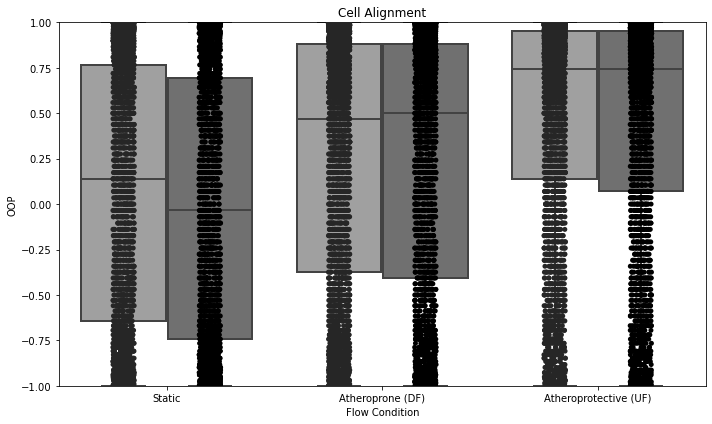

In [97]:
gray_scale_palette = ["#A0A0A0", "#707070"]

# Create the box plot
plt.figure(figsize=(10, 6))

# Add boxes for grouped observations
ax = sns.boxplot(x='flow', y='oop_zero', hue='treatment', data=elong_df_s,
                 order=['Static', 'DF', 'UF'], palette=gray_scale_palette, linewidth=2)

# Ensure legends are placed outside the plot
legend = ax.legend(title='Treatment', loc='upper left', bbox_to_anchor=(1.04, 1))

# Add strip plot on top of the box plot for individual points
strip_plot = sns.stripplot(x='flow', y='oop_zero', hue='treatment', data=elong_df_s,
                           order=['Static', 'DF', 'UF'], palette='dark:black', dodge=True,
                           jitter=True, alpha=1, marker='o', ax=ax)
strip_plot.legend_.remove()  # Remove legend for stripplot to avoid duplication

# Customize the plot
plt.xlabel('Flow Condition')
plt.ylabel('OOP')
plt.title('Cell Alignment')
ax.set_xticklabels(['Static', 'Atheroprone (DF)', 'Atheroprotective (UF)'])

plt.tight_layout()
plt.ylim([-1,1])
plt.show()

In [85]:



sector_oop_s = elong_df_s.groupby('sector_samp').agg(
    med_oop=pd.NamedAgg(column='oop_zero', aggfunc='median'),  # Calculate median of 'oop_zero'
    std_oop=pd.NamedAgg(column='oop_zero', aggfunc='std'),     # Calculate standard deviation of 'oop_zero'
    exp_num=pd.NamedAgg(column='exp_num', aggfunc='first'),    # Take the first value of 'exp_num'
    g_name=pd.NamedAgg(column='g_name', aggfunc='first'),      # Take the first value of 'g_name'
    treatment=pd.NamedAgg(column='treatment', aggfunc='first'),# Take the first value of 'treatment'
    flow=pd.NamedAgg(column='flow', aggfunc='first'),          # Take the first value of 'flow'
    date=pd.NamedAgg(column='date', aggfunc='first'),          # Take the first value of 'date'
    group=pd.NamedAgg(column='group', aggfunc='first'),        # Take the first value of 'group'
    replicate=pd.NamedAgg(column='replicate', aggfunc='first'),# Take the first value of 'replicate'
    sector_samp=pd.NamedAgg(column='sector_samp', aggfunc='first') # Take the first value of 'sector sample'
)

# Resetting index to turn the grouped by column into a normal column
sector_oop_s = sector_oop_s.reset_index(drop=True)

In [86]:
sector_oop_s

,med_oop,std_oop,exp_num,g_name,treatment,flow,date,group,replicate,sector_samp
0,0.913545,0.380217,0,No Treatment-UF,No Treatment,UF,51023,11,1,0
1,0.913545,0.437799,0,No Treatment-UF,No Treatment,UF,51023,11,1,1
2,0.731242,0.616510,0,No Treatment-UF,No Treatment,UF,51023,11,1,2
3,0.898794,0.555546,0,No Treatment-UF,No Treatment,UF,51023,11,1,3
4,0.034899,0.649355,1,No Treatment-DF,No Treatment,DF,51023,9,1,4
...,...,...,...,...,...,...,...,...,...,...
103,-0.069756,0.713718,58,Heparin S1P-Static,Heparin S1P,Static,31723,7,2,235
104,0.615661,0.635619,59,Heparin S1P-DF,Heparin S1P,DF,31723,6,2,236
105,0.453921,0.739837,59,Heparin S1P-DF,Heparin S1P,DF,31723,6,2,237
106,0.468328,0.684875,59,Heparin S1P-DF,Heparin S1P,DF,31723,6,2,238


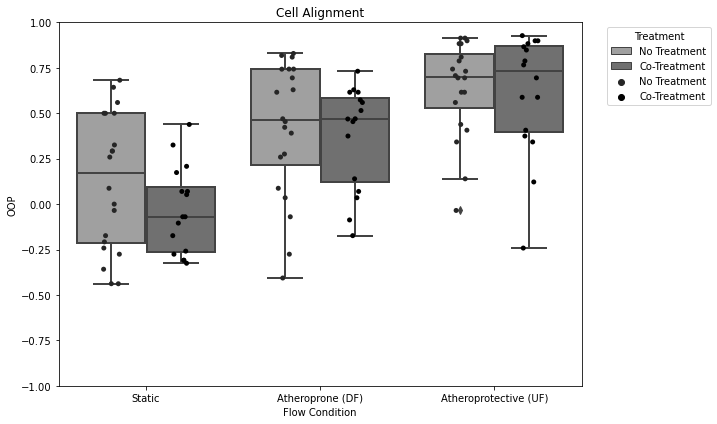

In [101]:
gray_scale_palette = ["#A0A0A0", "#707070"]

# Create the box plot
plt.figure(figsize=(10, 6))

# Add boxes for grouped observations
ax = sns.boxplot(x='flow', y='med_oop', hue='treatment', data=sector_oop_s,
                 order=['Static', 'DF', 'UF'], palette=gray_scale_palette, linewidth=2)

# Ensure legends are placed outside the plot
legend = ax.legend(title='Treatment', loc='upper left', bbox_to_anchor=(1.04, 1))

# Add strip plot on top of the box plot for individual points
strip_plot = sns.stripplot(x='flow', y='med_oop', hue='treatment', data=sector_oop_s,
                           order=['Static', 'DF', 'UF'], palette='dark:black', dodge=True,
                           jitter=True, alpha=1, marker='o', ax=ax)
strip_plot.legend_.remove()  # Remove legend for stripplot to avoid duplication
legend = ax.legend(title='Treatment', loc='upper left', bbox_to_anchor=(1.04, 1))

# Customize the plot
plt.xlabel('Flow Condition')
plt.ylabel('OOP')
plt.title('Cell Alignment')
ax.set_xticklabels(['Static', 'Atheroprone (DF)', 'Atheroprotective (UF)'])

plt.tight_layout()
plt.ylim([-1,1])
plt.show()

In [98]:
sector_oop_s['treatment'] = sector_oop_s['treatment'].replace('Heparin S1P', 'Co-Treatment')

sector_oop_s.to_csv('oop_allignment_sectors_sub_df.csv')

In [9]:
elong_df15 = master_df[master_df['ratio']>1.5].copy()
elong_df15

,exp_num,file_name,data_path,treatment,flow,time,cell_age,date,group,replicate,...,rot90_bar,rot90_bar_all,oop_bar,oop_zero,g_name,age,rot90-rot90_bar,rad,quad,sector_samp
1,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,0.999988,0.997564,No Treatment-UF,8,0.143190,-0.034907,3.0,0
2,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,0.811945,0.766044,No Treatment-UF,8,-17.856810,-0.349066,3.0,0
3,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,0.971493,0.951057,No Treatment-UF,8,-6.856810,-0.157080,4.0,1
5,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,0.997203,1.000000,No Treatment-UF,8,2.143190,0.000000,3.0,0
6,0,HCAEC P8_12 hr UF_No Treatment_51023.czi,Cell Alignment/No Treatment/5.10.23,No Treatment,UF,12 hr,P8,51023,11,1,...,-2.143190,-1.257434,-0.715859,-0.766044,No Treatment-UF,8,-67.856810,-1.221730,4.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75135,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,-5.759441,-4.543847,0.989065,0.939693,Heparin S1P-DF,6,-4.240559,-0.174533,1.0,239
75137,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,-5.759441,-4.543847,0.250061,0.438371,Heparin S1P-DF,6,37.759441,0.558505,1.0,239
75138,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,-5.759441,-4.543847,-0.910098,-0.809017,Heparin S1P-DF,6,77.759441,1.256637,2.0,238
75139,59,HCAEC P6_12 hr DF_Heparin S1P Treatment_31723.czi,Cell Alignment/Heparin + Albumin bound S1P/3.1...,Heparin S1P,DF,12 hr,P6,31723,6,2,...,-5.759441,-4.543847,0.991402,0.997564,Heparin S1P-DF,6,3.759441,-0.034907,2.0,238


In [102]:
e0 = elong_df[elong_df['exp_num']==0]
len(e0)

859

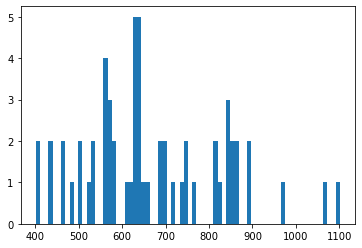

In [108]:
cell_counts = [len(elong_df[elong_df['exp_num']==i]) for i in range(np.max(list(elong_df['exp_num'])))]
plt.hist(cell_counts,bins = 72);

In [113]:
centers.shape

(859, 2)

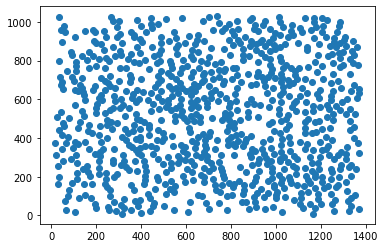

In [114]:
centers = np.array(list(e0['center']))
plt.scatter(centers[:,0],centers[:,1])

In [10]:
elong_df.columns
        

Index(['exp_num', 'file_name', 'data_path', 'treatment', 'flow', 'time',
       'cell_age', 'date', 'group', 'replicate', 'obj_num', 'area', 'ellipse',
       'center', 'length', 'ratio', 'rot90', 'elong2', 'rot90_bar',
       'rot90_bar_all', 'oop_bar', 'oop_zero', 'g_name', 'age',
       'rot90-rot90_bar', 'rad', 'quad', 'sector_samp'],
      dtype='object')

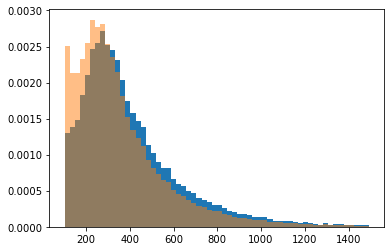

In [16]:
plt.hist(elong_df['area'],bins = 60,density = True,);
plt.hist(master_df['area'],bins = 60,density = True,alpha = 0.5);


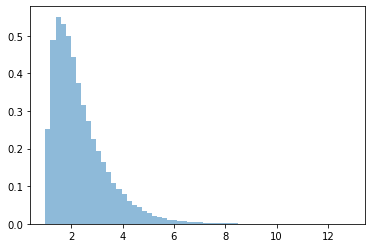

In [17]:
plt.hist(master_df['ratio'],bins = 60,density = True,alpha = 0.5);

In [37]:
e0.to_csv('elong_e0_test.csv')

## plot pairwise dot product as a function of distance

In [11]:
def process_group(group):

    group.reset_index(drop=True, inplace=True)
    # Extract and store all centers and rads
    all_centers = group['center'].tolist()
    all_rads = group['rad'].tolist()

    # Compute pairwise distances
    coords = np.array(all_centers)
    pair_dists = squareform(pdist(coords, 'euclidean'))

    # Convert rads to unit vectors and compute pairwise dot products
    unit_vectors = np.array([np.cos(all_rads), np.sin(all_rads)]).T
    pair_dot = np.dot(unit_vectors, unit_vectors.T)

    # Mask to exclude self-distances and reverse dot products
    mask = np.tri(pair_dists.shape[0], dtype=bool, k=-1)
    pair_dists = pair_dists[mask]
    pair_dot = pair_dot[mask]

    # Calculate absolute dot products
    abs_dot_products = np.abs(pair_dot)

    return pd.Series({
        'exp_num': group.loc[1,'exp_num'],
        'g_name': group.loc[1,'g_name'],
        'treatment': group.loc[1,'treatment'],
        'flow': group.loc[1,'flow'],
        'time': group.loc[1,'time'],
        'cell_age': group.loc[1,'cell_age'],
        'date': group.loc[1,'date'],
        'group': group.loc[1,'group'],
        'replicate': group.loc[1,'replicate'],
        'all_center': all_centers,
        'all_rad': all_rads,
        'pair_dists': pair_dists,
        'pair_dot': abs_dot_products,
        'sector_samp':group.loc[1,'sector_samp']
    })


result_df = elong_df.groupby('exp_num').apply(process_group)

# Reset index of the result DataFrame
result_df.reset_index(drop=True, inplace=True)
result_df


sector_df = elong_df15.groupby('sector_samp').apply(process_group)
sector_df.reset_index(drop=True, inplace=True)
sector_df

,exp_num,g_name,treatment,flow,time,cell_age,date,group,replicate,all_center,all_rad,pair_dists,pair_dot,sector_samp
0,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(314.193115234375, 7.629621505737305), (399.5...","[-0.03490658503988659, -0.3490658503988659, 0....","[85.61355843635576, 127.67196760714363, 42.252...","[0.9510565162951536, 0.9993908270190958, 0.939...",0
1,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(1163.43115234375, 9.578180313110352), (609.2...","[-0.15707963267948966, -1.2217304763960306, -0...","[554.2931417799526, 135.30786935576833, 419.16...","[0.4848096202463371, 0.9961946980917455, 0.406...",1
2,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(400.26666259765625, 706.649169921875), (299....","[1.2217304763960306, 1.0821041362364843, 1.204...","[101.87153096200566, 117.54730280862391, 18.03...","[0.9902680687415703, 0.9998476951563913, 0.992...",2
3,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(945.9998168945312, 694.721435546875), (1275....","[0.29670597283903605, 0.017453292519943295, -0...","[329.0868293317445, 264.2810363500422, 593.318...","[0.9612616959383188, 0.7986355100472928, 0.933...",3
4,1,No Treatment-DF,No Treatment,DF,12 hr,P8,51023,9,1,"[(75.10982513427734, 12.140083312988281), (129...","[-0.5235987755982988, -1.3788101090755203, -0....","[54.73469546615829, 115.90362915901649, 61.441...","[0.6560590289905074, 0.9743700647852352, 0.469...",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,58,Heparin S1P-Static,Heparin S1P,Static,12 hr,P6,31723,7,2,"[(939.6458740234375, 702.29443359375), (1191.8...","[1.3439035240356338, -0.7330382858376184, 1.48...","[252.22763030535984, 155.0232502091826, 407.11...","[0.4848096202463371, 0.9902680687415704, 0.601...",235
236,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"[(46.938480377197266, 22.62933921813965), (324...","[0.33161255787892263, -0.017453292519943295, 0...","[277.53017698934707, 221.28204394990698, 56.37...","[0.9396926207859084, 0.9961946980917455, 0.906...",236
237,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"[(1067.347900390625, 10.36957836151123), (637....","[-0.5235987755982988, -1.53588974175501, -1.53...","[429.4877155161499, 119.19143985667634, 310.29...","[0.529919264233205, 0.529919264233205, 1.0, 0....",237
238,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"[(242.75643920898438, 698.4490966796875), (312...","[-0.5759586531581288, -0.6981317007977318, -0....","[70.52753005105505, 222.98456460469808, 152.99...","[0.9925461516413221, 0.9781476007338057, 0.996...",238


In [12]:
""" bin the distances and get average dot product between them"""

def process_row(row,bin_size = 250):
    # Extract pair_dists and pair_dot
    pair_dists = row['pair_dists']
    pair_dot = row['pair_dot']

    # Define the bins with a size of 250
    max_dist = max(pair_dists)
    bins = np.arange(0, max_dist + bin_size, bin_size)

    # Find the bin index for each pair_dist
    bin_indices = np.digitize(pair_dists, bins) - 1

    # Initialize arrays to store the averages and bin centers
    bin_centers = []
    avg_dot = []

    for i in range(len(bins) - 1):
        # Indices of elements in the current bin
        in_bin = bin_indices == i

        # Compute average of pair_dot for the current bin
        if np.any(in_bin):  # Check if the bin is not empty
            avg_dot_value = np.mean(pair_dot[in_bin])
            avg_dot.append(avg_dot_value)

            # Compute the center of the current bin
            bin_center = (bins[i] + bins[i + 1]) / 2
            bin_centers.append(bin_center)

    return np.array(bin_centers), np.array(avg_dot)

In [13]:
# Example of processing a specific row (e.g., the first row)
bin_centers, avg_dots = process_row(result_df.iloc[0])

In [14]:
# import matplotlib.pyplot as plt

# # Define color and marker styles
# treatment_colors = {'No Treatment': 'red', 'Heparin 2 UmL': 'blue', 'Albumin bound S1P': 'green', 'Heparin S1P': 'purple'}
# flow_markers = {'UF': 'o', 'DF': 's', 'Static': '^'}

# # Create a figure and axis
# fig, ax = plt.subplots()

# # Plot data
# for name, group in result_df.groupby('group'):
#     for _, row in group.iterrows():
#         bin_centers, avg_dots = process_row(row,250)
#         color = treatment_colors[row['treatment']]
#         marker = flow_markers[row['flow']]
#         ax.plot(bin_centers, avg_dots, color=color, marker=marker, label=f"{row['treatment']}_{row['flow']}")

# # Create custom legends
# from matplotlib.lines import Line2D
# custom_lines = [Line2D([0], [0], color=c, lw=4) for c in treatment_colors.values()]
# ax.legend(custom_lines, treatment_colors.keys(), title='Treatment')

# # Handle duplicate labels in the legend
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# #ax.legend(by_label.values(), by_label.keys(), loc='upper right', title='Flow/Treatment')
# legend = ax.legend(by_label.values(), by_label.keys(), loc='upper left', bbox_to_anchor=(1, 1), title='Flow/Treatment')


# plt.xlabel('Bin Centers')
# plt.ylabel('Average Dot Values')
# plt.title('Plot of Bin Centers vs. Average Dot Values')
# plt.show()


In [15]:
result_df

,exp_num,g_name,treatment,flow,time,cell_age,date,group,replicate,all_center,all_rad,pair_dists,pair_dot,sector_samp
0,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(314.193115234375, 7.629621505737305), (399.5...","[-0.03490658503988659, -0.3490658503988659, -0...","[85.61355843635576, 849.2402725700248, 763.882...","[0.9510565162951536, 0.9925461516413221, 0.981...",0
1,1,No Treatment-DF,No Treatment,DF,12 hr,P8,51023,9,1,"[(75.10982513427734, 12.140083312988281), (109...","[-0.5235987755982988, -0.6457718232379019, -1....","[1015.8937999095443, 743.5799037016285, 272.88...","[0.9925461516413221, 0.587785252292473, 0.6819...",5
2,2,No Treatment-Static,No Treatment,Static,12 hr,P8,51023,10,1,"[(375.0243835449219, 23.017526626586914), (67....","[-1.5707963267948966, -0.8901179185171081, -1....","[307.69834161178375, 789.6344705104068, 1097.3...","[0.7771459614569709, 0.9986295347545738, 0.809...",8
3,3,No Treatment-DF,No Treatment,DF,12 hr,P7,5823,9,5,"[(1131.43310546875, 8.80566120147705), (678.51...","[0.017453292519943295, 0.19198621771937624, -0...","[452.9263030474886, 1012.1161475310762, 559.30...","[0.9848077530122081, 0.9563047559630355, 0.891...",12
4,4,No Treatment-Static,No Treatment,Static,12 hr,P7,5823,10,5,"[(506.1739501953125, 8.710190773010254), (1002...","[0.3839724354387525, 0.7504915783575618, -0.33...","[496.21488199013896, 161.5350956428839, 657.45...","[0.9335804264972017, 0.7547095802227721, 0.469...",17
5,5,No Treatment-UF,No Treatment,UF,12 hr,P7,5823,11,5,"[(527.5765380859375, 18.13809585571289), (70.6...","[0.47123889803846897, -1.4835298641951802, 1.4...","[457.50022289612224, 347.2028706910456, 111.82...","[0.37460659341591207, 0.5735764363510462, 0.97...",21
6,6,No Treatment-Static,No Treatment,Static,12 hr,P8,51823,10,2,"[(53.98103332519531, 31.601511001586914), (160...","[1.4835298641951802, 0.8726646259971648, -1.06...","[106.94673397160234, 218.76702453810069, 112.2...","[0.8191520442889918, 0.8290375725550416, 0.358...",24
7,7,No Treatment-UF,No Treatment,UF,12 hr,P8,51823,11,2,"[(98.83280181884766, 8.874138832092285), (172....","[0.24434609527920614, -0.9599310885968813, -0....","[73.6872389086208, 333.4611677888586, 259.7769...","[0.3583679495453002, 0.754709580222772, 0.8829...",28
8,8,No Treatment-DF,No Treatment,DF,12 hr,P8,51823,9,2,"[(358.165283203125, 6.48284387588501), (860.32...","[0.017453292519943295, -1.4835298641951802, 1....","[502.3474831841843, 169.4776417914046, 670.829...","[0.06975647374412527, 0.43837114678907746, 0.8...",33
9,9,No Treatment-UF,No Treatment,UF,12 hr,P7,5223,11,3,"[(560.0182495117188, 10.014459609985352), (404...","[1.53588974175501, 0.33161255787892263, -0.925...","[155.80221324480758, 293.17261267924295, 448.4...","[0.35836794954530043, 0.7771459614569708, 0.30...",37


In [16]:
result_df['median_dot'] = result_df['pair_dot'].apply(np.median)
result_df['std_dot'] = result_df['pair_dot'].apply(np.std)

sector_df['median_dot'] = sector_df['pair_dot'].apply(np.median)
sector_df['std_dot'] = sector_df['pair_dot'].apply(np.std)

In [67]:
result_df_s = result_df[result_df['treatment'].isin(['No Treatment', 'Heparin S1P'])]
sector_df_s = sector_df[sector_df['treatment'].isin(['No Treatment', 'Heparin S1P'])]

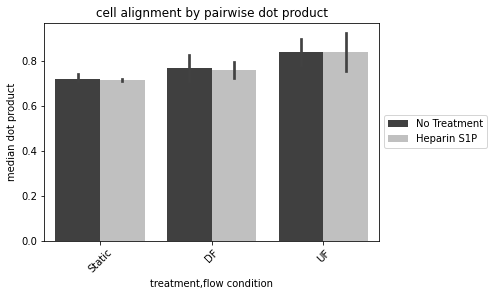

In [68]:
gray_scale_palette = ["#404040", "#C0C0C0"]  # Dark gray and light gray

plt.figure()
ax = sns.barplot(x='flow', y='median_dot',hue = 'treatment', data=result_df_s,order = ['Static','DF','UF'],
                 palette = gray_scale_palette)
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('cell alignment by pairwise dot product')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

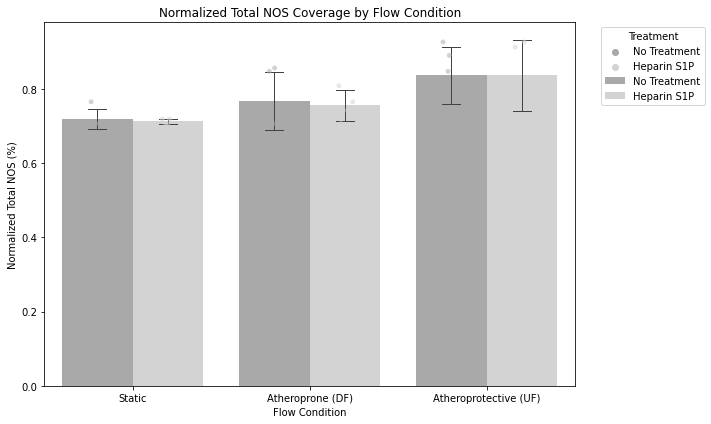

In [27]:
gray_scale_palette = ["#A9A9A9", "#D3D3D3"]  # Slightly lighter grays for better contrast on print

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='flow', y='median_dot', hue='treatment', data=result_df_s,
                 order=['Static', 'DF', 'UF'], palette=gray_scale_palette, errorbar='sd', capsize=.1, errwidth=1)

# Add points for individual observations
sns.stripplot(x='flow', y='median_dot', hue='treatment', data=result_df_s,
              order=['Static', 'DF', 'UF'], palette=gray_scale_palette, dodge=True, jitter=True, alpha=0.5, marker='o', ax=ax)

# Customize the plot
plt.xlabel('Flow Condition')
plt.ylabel('median dot product')
plt.title('cell alignment by pairwise dot product')
ax.set_xticklabels(['Static', 'Atheroprone (DF)', 'Atheroprotective (UF)'])
ax.legend(title='Treatment', loc='upper left', bbox_to_anchor=(1.04, 1))
#plt.axhline(y=1, color='gray', linestyle='--')  # Reference line

# # Significance annotations
# def annotate_significance(stat, x1, x2, y, h, ax):
#     ax.plot([x1, x2], [y + h, y + h], lw=1.5, c='black')
#     ax.text((x1 + x2) * 0.5, y + h, stat, ha='center', va='bottom', color='black')

# annotate_significance('*', 0, 1, 2, 0.1, ax)
# annotate_significance('***', 1, 2, 2, 0.1, ax)

plt.tight_layout()
plt.show()

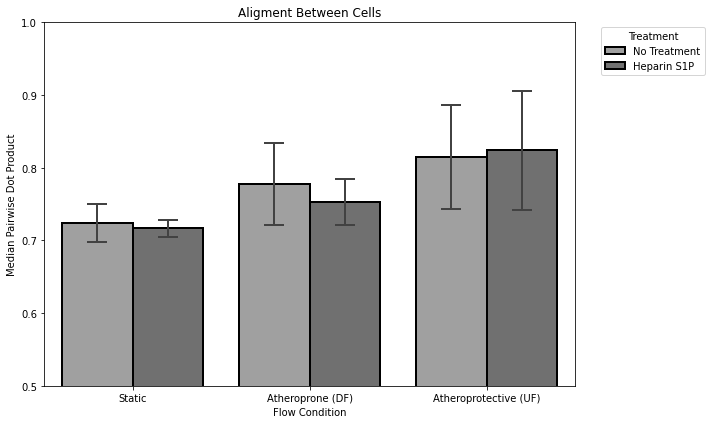

In [88]:
# Define a darker grayscale palette
gray_scale_palette = ["#A0A0A0","#707070" ]  # Darker grays for better visibility

# Create the bar plot
plt.figure(figsize=(10, 6))

# Add points for individual observations
strip_plot = sns.stripplot(x='flow', y='median_dot', hue='treatment', data=result_df_s,
                           order=['Static', 'DF', 'UF'], palette='dark:black', dodge=True, jitter=True, alpha=1,
                           marker='o', ax=ax)
strip_plot.legend_.remove()  # Remove legend for stripplot
ax = sns.barplot(x='flow', y='median_dot', hue='treatment', data=sector_df_s,
                 order=['Static', 'DF', 'UF'], palette=gray_scale_palette, edgecolor='black',
                 linewidth=2, errorbar='sd', capsize=.1, errwidth=2, dodge = True)

# Customize the plot
plt.xlabel('Flow Condition')
plt.ylabel('Median Pairwise Dot Product')
plt.title('Aligment Between Cells')
ax.set_xticklabels(['Static', 'Atheroprone (DF)', 'Atheroprotective (UF)'])
legend = ax.legend(title='Treatment', loc='upper left', bbox_to_anchor=(1.04, 1))


plt.tight_layout()
plt.ylim([0.5,1])
plt.show()


In [70]:
sector_df_s

,exp_num,g_name,treatment,flow,time,cell_age,date,group,replicate,all_center,all_rad,pair_dists,pair_dot,sector_samp,median_dot,std_dot
0,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(314.193115234375, 7.629621505737305), (399.5...","[-0.03490658503988659, -0.3490658503988659, 0....","[85.61355843635576, 127.67196760714363, 42.252...","[0.9510565162951536, 0.9993908270190958, 0.939...",0,0.945519,0.207286
1,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(1163.43115234375, 9.578180313110352), (609.2...","[-0.15707963267948966, -1.2217304763960306, -0...","[554.2931417799526, 135.30786935576833, 419.16...","[0.4848096202463371, 0.9961946980917455, 0.406...",1,0.927184,0.236593
2,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(400.26666259765625, 706.649169921875), (299....","[1.2217304763960306, 1.0821041362364843, 1.204...","[101.87153096200566, 117.54730280862391, 18.03...","[0.9902680687415703, 0.9998476951563913, 0.992...",2,0.838671,0.276571
3,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"[(945.9998168945312, 694.721435546875), (1275....","[0.29670597283903605, 0.017453292519943295, -0...","[329.0868293317445, 264.2810363500422, 593.318...","[0.9612616959383188, 0.7986355100472928, 0.933...",3,0.906308,0.263924
4,1,No Treatment-DF,No Treatment,DF,12 hr,P8,51023,9,1,"[(75.10982513427734, 12.140083312988281), (129...","[-0.5235987755982988, -1.3788101090755203, -0....","[54.73469546615829, 115.90362915901649, 61.441...","[0.6560590289905074, 0.9743700647852352, 0.469...",4,0.754710,0.303929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,58,Heparin S1P-Static,Heparin S1P,Static,12 hr,P6,31723,7,2,"[(939.6458740234375, 702.29443359375), (1191.8...","[1.3439035240356338, -0.7330382858376184, 1.48...","[252.22763030535984, 155.0232502091826, 407.11...","[0.4848096202463371, 0.9902680687415704, 0.601...",235,0.719340,0.306805
236,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"[(46.938480377197266, 22.62933921813965), (324...","[0.33161255787892263, -0.017453292519943295, 0...","[277.53017698934707, 221.28204394990698, 56.37...","[0.9396926207859084, 0.9961946980917455, 0.906...",236,0.788011,0.296321
237,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"[(1067.347900390625, 10.36957836151123), (637....","[-0.5235987755982988, -1.53588974175501, -1.53...","[429.4877155161499, 119.19143985667634, 310.29...","[0.529919264233205, 0.529919264233205, 1.0, 0....",237,0.731354,0.308302
238,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"[(242.75643920898438, 698.4490966796875), (312...","[-0.5759586531581288, -0.6981317007977318, -0....","[70.52753005105505, 222.98456460469808, 152.99...","[0.9925461516413221, 0.9781476007338057, 0.996...",238,0.766044,0.297545


In [74]:
ccs = ['exp_num','g_name','treatment','flow','date','group','replicate','sector_samp','median_dot','std_dot']

sector_sub_df = sector_df_s[ccs].copy()
sector_sub_df['treatment'] = sector_sub_df['treatment'].replace('Heparin S1P', 'Co-Treatment')
sector_sub_df

,exp_num,g_name,treatment,flow,date,group,replicate,sector_samp,median_dot,std_dot
0,0,No Treatment-UF,No Treatment,UF,51023,11,1,0,0.945519,0.207286
1,0,No Treatment-UF,No Treatment,UF,51023,11,1,1,0.927184,0.236593
2,0,No Treatment-UF,No Treatment,UF,51023,11,1,2,0.838671,0.276571
3,0,No Treatment-UF,No Treatment,UF,51023,11,1,3,0.906308,0.263924
4,1,No Treatment-DF,No Treatment,DF,51023,9,1,4,0.754710,0.303929
...,...,...,...,...,...,...,...,...,...,...
235,58,Heparin S1P-Static,Co-Treatment,Static,31723,7,2,235,0.719340,0.306805
236,59,Heparin S1P-DF,Co-Treatment,DF,31723,6,2,236,0.788011,0.296321
237,59,Heparin S1P-DF,Co-Treatment,DF,31723,6,2,237,0.731354,0.308302
238,59,Heparin S1P-DF,Co-Treatment,DF,31723,6,2,238,0.766044,0.297545


In [75]:
sector_sub_df.to_csv('pairwise_allignment_sectors_sub_df.csv')

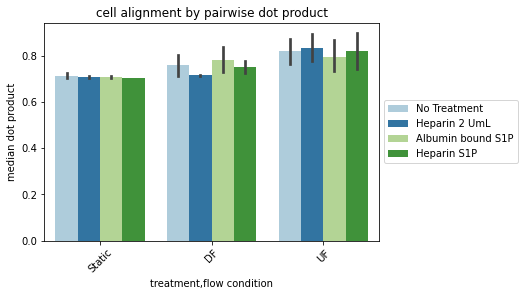

In [44]:
plt.figure()
ax = sns.barplot(x='flow', y='median_dot',hue = 'treatment', data=result_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('cell alignment by pairwise dot product')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

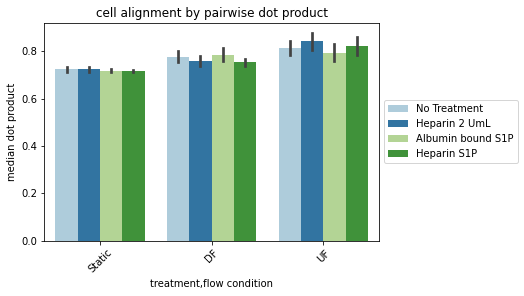

In [45]:
########## elong 1.5 ################

plt.figure()
ax = sns.barplot(x='flow', y='median_dot',hue = 'treatment', data=sector_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('cell alignment by pairwise dot product')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

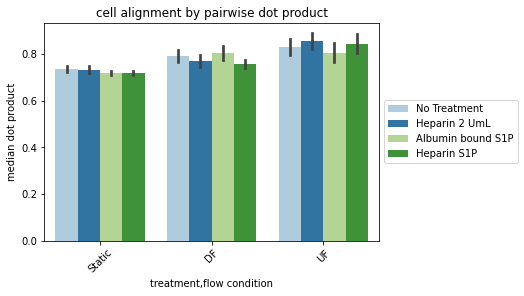

In [40]:
plt.figure()
ax = sns.barplot(x='flow', y='median_dot',hue = 'treatment', data=sector_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('cell alignment by pairwise dot product')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

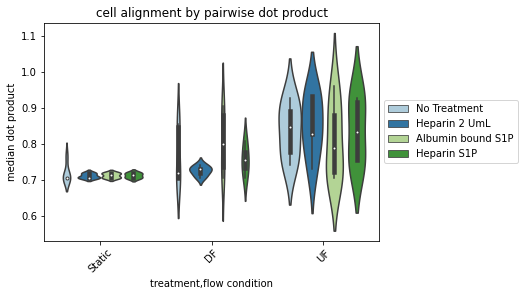

In [65]:
plt.figure()
ax = sns.violinplot(x='flow', y='median_dot',hue = 'treatment', data=result_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('cell alignment by pairwise dot product')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [64]:
ax = sns.pointplot(x='flow', y='median_dot', hue='treatment', data=result_df, 
                   order=['Static', 'DF', 'UF'], palette="Paired", 
                   capsize=.1, errwidth=1, scale=1, markers='o', 
                   join=False, dodge=True, yerr='std_dot')

# Customize the plot
plt.xlabel('Treatment, Flow Condition')
plt.ylabel('Median Dot Product')
plt.title('cell alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

TypeError: pointplot() got an unexpected keyword argument 'yerr'

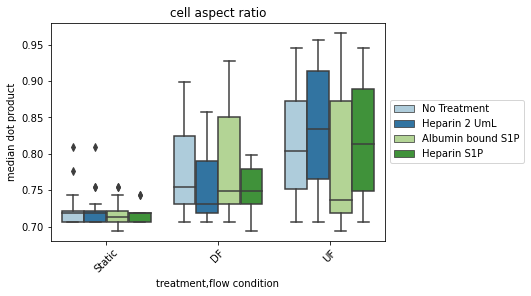

In [63]:
"""median dot based on sector sampleing"""

plt.figure()
ax = sns.boxplot(x='flow', y='median_dot',hue = 'treatment', data=sector_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('cell aspect ratio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [39]:
ax = sns.pointplot(x='flow', y='median_dot', hue='treatment', data=sector_df, 
                   order=['Static', 'DF', 'UF'], palette="Paired", 
                   capsize=.1, errwidth=1, scale=1, markers='o', 
                   join=False, dodge=True, yerr='std_dot')

# Customize the plot
plt.xlabel('Treatment, Flow Condition')
plt.ylabel('Median Dot Product')
plt.title('cell alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

TypeError: pointplot() got an unexpected keyword argument 'yerr'

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

DF_No Treatment vs. DF_Heparin S1P: Custom statistical test, P_val:7.882e-01
Static_No Treatment vs. Static_Heparin S1P: Custom statistical test, P_val:6.654e-01
UF_No Treatment vs. UF_Heparin S1P: Custom statistical test, P_val:9.970e-01


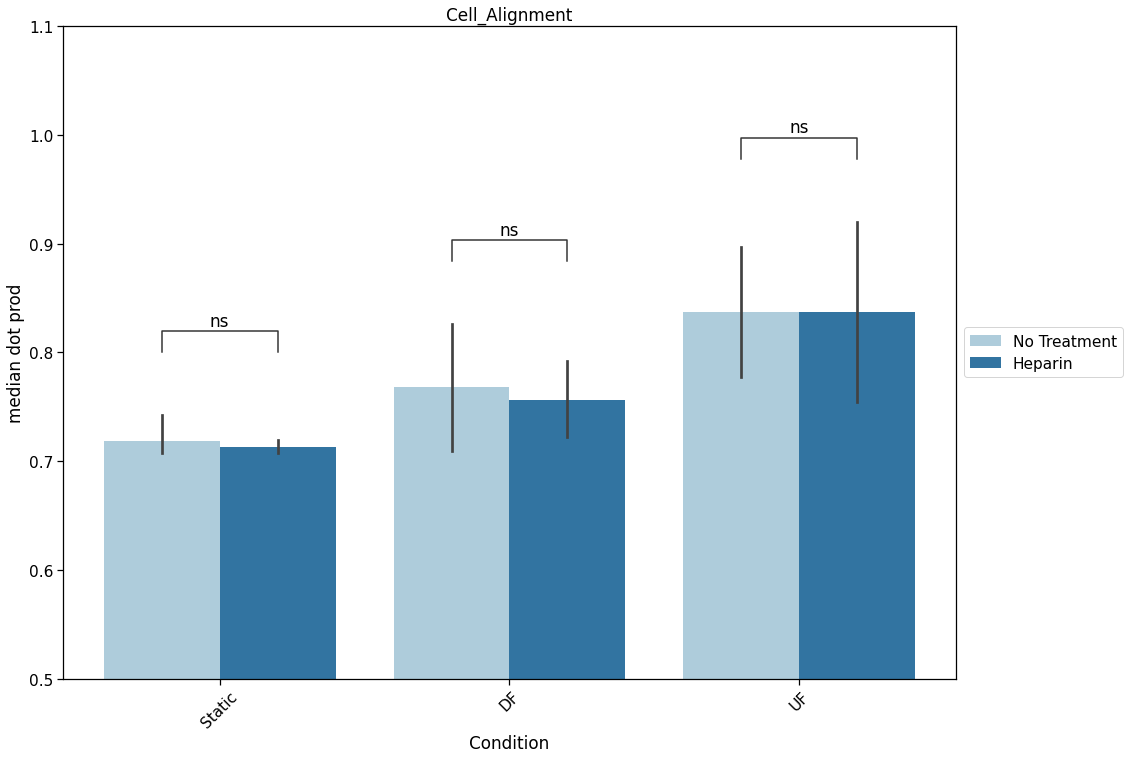

In [69]:
plot_df = result_df_s

pairs = []
p_vals = []
for (i, j) in combinations(plot_df['treatment'].unique(), 2):
    for flow in plot_df['flow'].unique():
        subset1 = plot_df[(plot_df['treatment'] == i) & (plot_df['flow'] == flow)]['median_dot']
        subset2 = plot_df[(plot_df['treatment'] == j) & (plot_df['flow'] == flow)]['median_dot']
        pairs.append(((flow,i),(flow,j)))
        #_, p_value = mannwhitneyu(subset1, subset2)
        _, p_value = ttest_ind(subset1, subset2, equal_var=False)  # Using Welch's t-test
        p_vals.append(p_value)


plotting_parameters = {
    'x': 'flow',
    'y': 'median_dot',
    'hue': 'treatment',
    'data': plot_df,
    'order': ['Static', 'DF', 'UF'],
    'palette': 'Paired'
}

#pairs = pairs
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in p_vals]

plt.figure(figsize = [16,12])
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    #ax = get_log_ax()

    # Plot with seaborn
    ax = sns.barplot(**plotting_parameters)
    

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(p_vals)
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()

    # Label and show
    #label_plot_for_subcats(ax)
    plt.xlabel('Condition')
    plt.ylabel('median dot prod')
    plt.title('Cell_Alignment')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['No Treatment', 'Heparin', 'S1P', 'Heparin+S1P']
    ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.ylim([0.5,1.1])
    plt.show()

No valid pairs found for annotation.


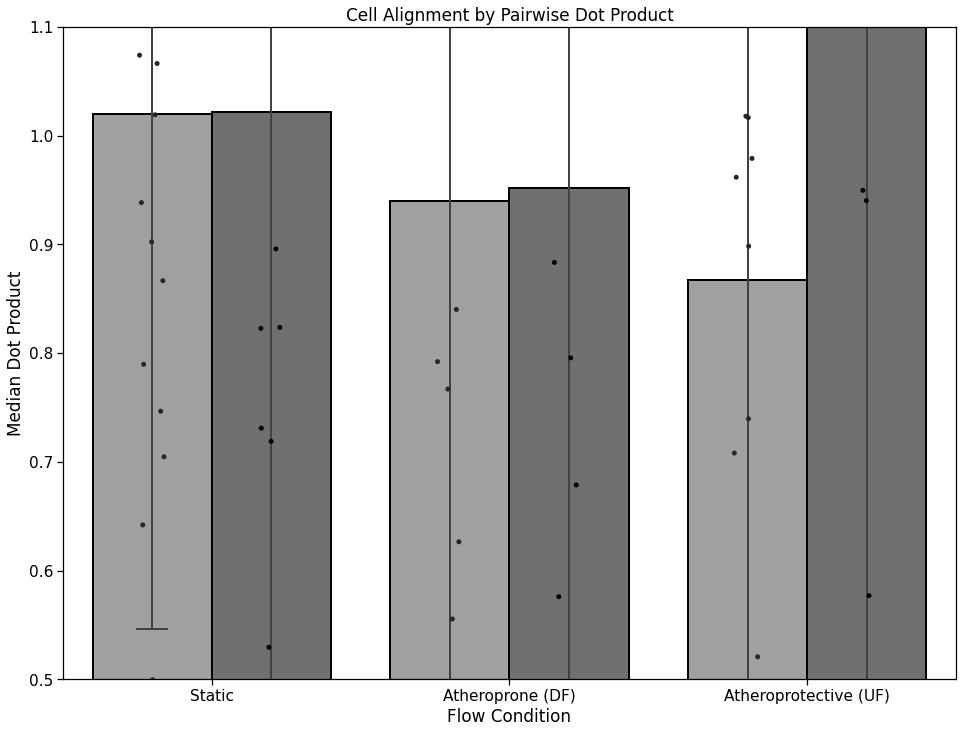

In [61]:
gray_scale_palette = ["#A0A0A0", "#707070"]  # Darker grays for better visibility

# # Data setup
# plot_df = result_df_s

gray_scale_palette = ["#A0A0A0", "#707070"]

# Set up combinations and test each pair across all flow conditions
pairs = []
p_vals = []

# Create a list of all treatment and flow combinations
group_combinations = [(flow, treatment) for flow in plot_df['flow'].unique() for treatment in plot_df['treatment'].unique()]

# Comparing every unique pair combination of treatment and flow
for (i, j) in combinations(range(len(group_combinations)), 2):
    flow_i, treatment_i = group_combinations[i]
    flow_j, treatment_j = group_combinations[j]
    subset_i = plot_df[(plot_df['treatment'] == treatment_i) & (plot_df['flow'] == flow_i)]['median_dot']
    subset_j = plot_df[(plot_df['treatment'] == treatment_j) & (plot_df['flow'] == flow_j)]['median_dot']
    _, p_value = ttest_ind(subset_i, subset_j, equal_var=False)
    pairs.append(((flow_i, treatment_i), (flow_j, treatment_j)))
    p_vals.append(p_value)

# Plotting
plt.figure(figsize=[16,12])
with sns.plotting_context('notebook', font_scale=1.4):
    ax = sns.barplot(x='flow', y='median_dot', hue='treatment', data=plot_df, palette=gray_scale_palette, edgecolor='black',
                     linewidth=2, errorbar='sd', capsize=0.1, errwidth=2, dodge=True)
    sns.stripplot(x='flow', y='median_dot', hue='treatment', data=plot_df, palette='dark:black', dodge=True,
                  jitter=True, alpha=1, marker='o', ax=ax).legend_.remove()

    # Ensure all specified pairs exist in the data
    actual_pairs = [(pair, p_val) for pair, p_val in zip(pairs, p_vals) if plot_df.query(f'flow == "{pair[0][0]}" and treatment == "{pair[0][1]}" and flow == "{pair[1][0]}" and treatment == "{pair[1][1]}"').size > 0]

    if actual_pairs:
        from statannotations.Annotator import Annotator
        annotator = Annotator(ax, [pair for pair, p_val in actual_pairs], **{'x': 'flow', 'y': 'median_dot', 'hue': 'treatment', 'data': plot_df})
        annotator.set_pvalues([p_val for pair, p_val in actual_pairs])
        annotator.annotate()
    else:
        print("No valid pairs found for annotation.")

    plt.xlabel('Flow Condition')
    plt.ylabel('Median Dot Product')
    plt.title('Cell Alignment by Pairwise Dot Product')
    ax.set_xticklabels(['Static', 'Atheroprone (DF)', 'Atheroprotective (UF)'])
    plt.ylim([0.5, 1.1])
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

UF_Albumin bound S1P vs. UF_Heparin S1P: Custom statistical test, P_val:1.833e-01
UF_No Treatment vs. UF_Heparin 2 UmL: Custom statistical test, P_val:3.315e-01
DF_Albumin bound S1P vs. DF_Heparin S1P: Custom statistical test, P_val:2.512e-02
Static_Albumin bound S1P vs. Static_Heparin S1P: Custom statistical test, P_val:9.740e-01
Static_No Treatment vs. Static_Heparin 2 UmL: Custom statistical test, P_val:8.977e-01
Static_Heparin 2 UmL vs. Static_Albumin bound S1P: Custom statistical test, P_val:1.430e-01
DF_No Treatment vs. DF_Heparin 2 UmL: Custom statistical test, P_val:2.600e-01
DF_Heparin 2 UmL vs. DF_Albumin bound S1P: Custom statistical test, P_val:1.280e-01
UF_Heparin 2 UmL vs. UF_Albumin bound S1P: Custom statistical test, P_val:7.473e-02
UF_Heparin 2 UmL vs. UF_Heparin S1P: Custom statistical test

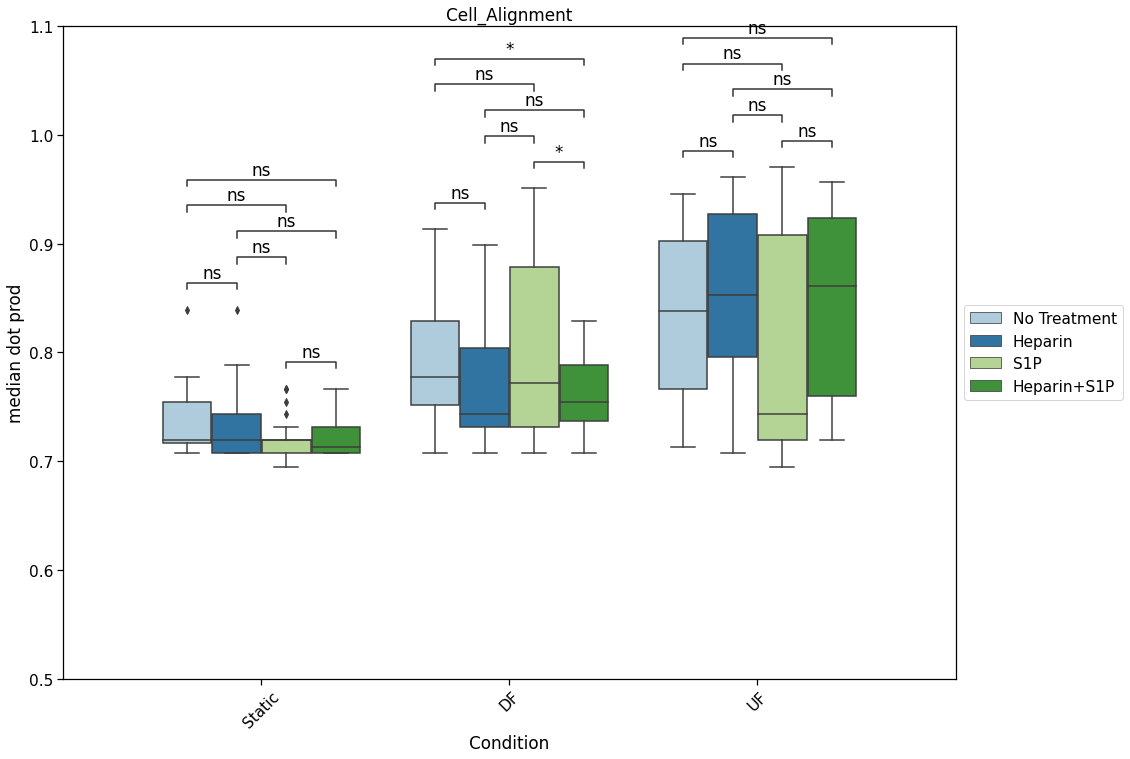

In [160]:
plot_df = sector_df



pairs = []
p_vals = []
for (i, j) in combinations(plot_df['treatment'].unique(), 2):
    for flow in plot_df['flow'].unique():
        subset1 = plot_df[(plot_df['treatment'] == i) & (plot_df['flow'] == flow)]['median_dot']
        subset2 = plot_df[(plot_df['treatment'] == j) & (plot_df['flow'] == flow)]['median_dot']
        pairs.append(((flow,i),(flow,j)))
        #_, p_value = mannwhitneyu(subset1, subset2)
        _, p_value = ttest_ind(subset1, subset2, equal_var=False)  # Using Welch's t-test
        p_vals.append(p_value)


plotting_parameters = {
    'x': 'flow',
    'y': 'median_dot',
    'hue': 'treatment',
    'data': plot_df,
    'order': ['Static', 'DF', 'UF'],
    'palette': 'Paired'
}

#pairs = pairs
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in p_vals]

plt.figure(figsize = [16,12])
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    #ax = get_log_ax()

    # Plot with seaborn
    ax = sns.boxplot(**plotting_parameters)
    

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(p_vals)
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()

    # Label and show
    #label_plot_for_subcats(ax)
    plt.xlabel('Condition')
    plt.ylabel('median dot prod')
    plt.title('Cell_Alignment')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['No Treatment', 'Heparin', 'S1P', 'Heparin+S1P']
    ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.ylim([0.5,1.1])
    plt.show()

In [32]:
""" expand the DF so list get their own value"""

expanded_rows = []

# Iterate over each row in the DataFrame
for _, row in result_df.iterrows():
    # Iterate over each element in the list columns
    for i in range(len(row['all_center'])):  # Assuming all lists have the same length
        new_row = row.to_dict()
        new_row['all_center'] = row['all_center'][i]
        new_row['all_rad'] = row['all_rad'][i]
        new_row['pair_dists'] = row['pair_dists'][i]
        new_row['pair_dot'] = row['pair_dot'][i]
        expanded_rows.append(new_row)

# Create a new DataFrame from the expanded rows
expanded_df = pd.DataFrame(expanded_rows)

expanded_df

,exp_num,g_name,treatment,flow,time,cell_age,date,group,replicate,all_center,all_rad,pair_dists,pair_dot,sector_samp,median_dot,std_dot
0,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"(314.193115234375, 7.629621505737305)",-0.034907,85.613558,0.951057,0,0.927184,0.237213
1,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"(399.5618591308594, 14.099471092224121)",-0.349066,849.240273,0.992546,0,0.927184,0.237213
2,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"(1163.43115234375, 9.578180313110352)",-0.157080,763.882674,0.981627,0,0.927184,0.237213
3,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"(441.03173828125, 22.193103790283203)",0.000000,127.671968,0.999391,0,0.927184,0.237213
4,0,No Treatment-UF,No Treatment,UF,12 hr,P8,51023,11,1,"(609.22265625, 19.26476287841797)",-1.221730,42.252311,0.939693,0,0.927184,0.237213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40227,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"(995.9623413085938, 1014.195556640625)",-0.087266,700.491858,0.275637,236,0.766044,0.302939
40228,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"(240.6724853515625, 1024.613525390625)",1.378810,125.482325,0.965926,236,0.766044,0.302939
40229,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"(204.124755859375, 1020.5563354492188)",1.012291,267.503391,0.992546,236,0.766044,0.302939
40230,59,Heparin S1P-DF,Heparin S1P,DF,12 hr,P6,31723,6,2,"(101.09074401855469, 1022.1510620117188)",1.256637,83.204180,0.945519,236,0.766044,0.302939


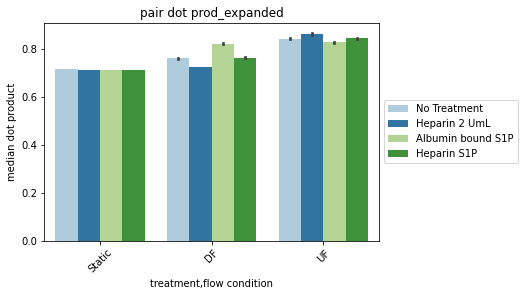

In [76]:
plt.figure()
ax = sns.barplot(x='flow', y='median_dot',hue = 'treatment', data=expanded_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('pair dot prod_expanded')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

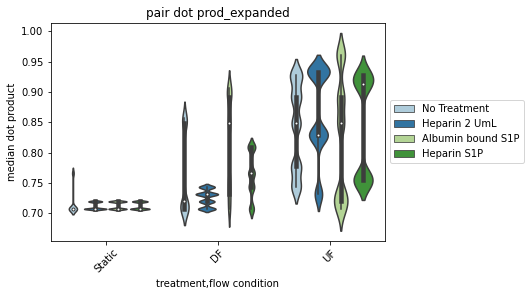

In [77]:
plt.figure()
ax = sns.violinplot(x='flow', y='median_dot',hue = 'treatment', data=expanded_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('pair dot prod_expanded')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

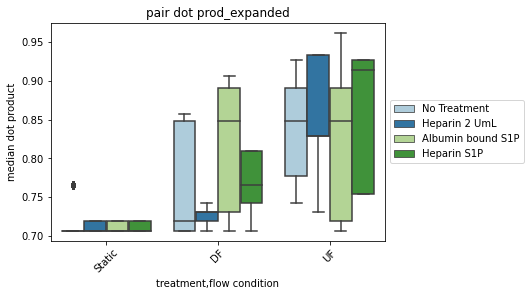

In [78]:
plt.figure()
ax = sns.boxplot(x='flow', y='median_dot',hue = 'treatment', data=expanded_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('median dot product')
plt.title('pair dot prod_expanded')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

UF_Albumin bound S1P vs. UF_Heparin S1P: Custom statistical test, P_val:2.707e-62
UF_No Treatment vs. UF_Heparin 2 UmL: Custom statistical test, P_val:1.489e-61
DF_Albumin bound S1P vs. DF_Heparin S1P: Custom statistical test, P_val:5.011e-161
Static_Albumin bound S1P vs. Static_Heparin S1P: Custom statistical test, P_val:2.860e-17
Static_No Treatment vs. Static_Heparin 2 UmL: Custom statistical test, P_val:7.960e-38
Static_Heparin 2 UmL vs. Static_Albumin bound S1P: Custom statistical test, P_val:1.084e-13
DF_No Treatment vs. DF_Heparin 2 UmL: Custom statistical test, P_val:1.725e-01
DF_Heparin 2 UmL vs. DF_Albumin bound S1P: Custom statistical test, P_val:0.000e+00
UF_Heparin 2 UmL vs. UF_Albumin bound S1P: Custom statistical test, P_val:6.659e-41
UF_Heparin 2 UmL vs. UF_Heparin S1P: Custom statistical tes

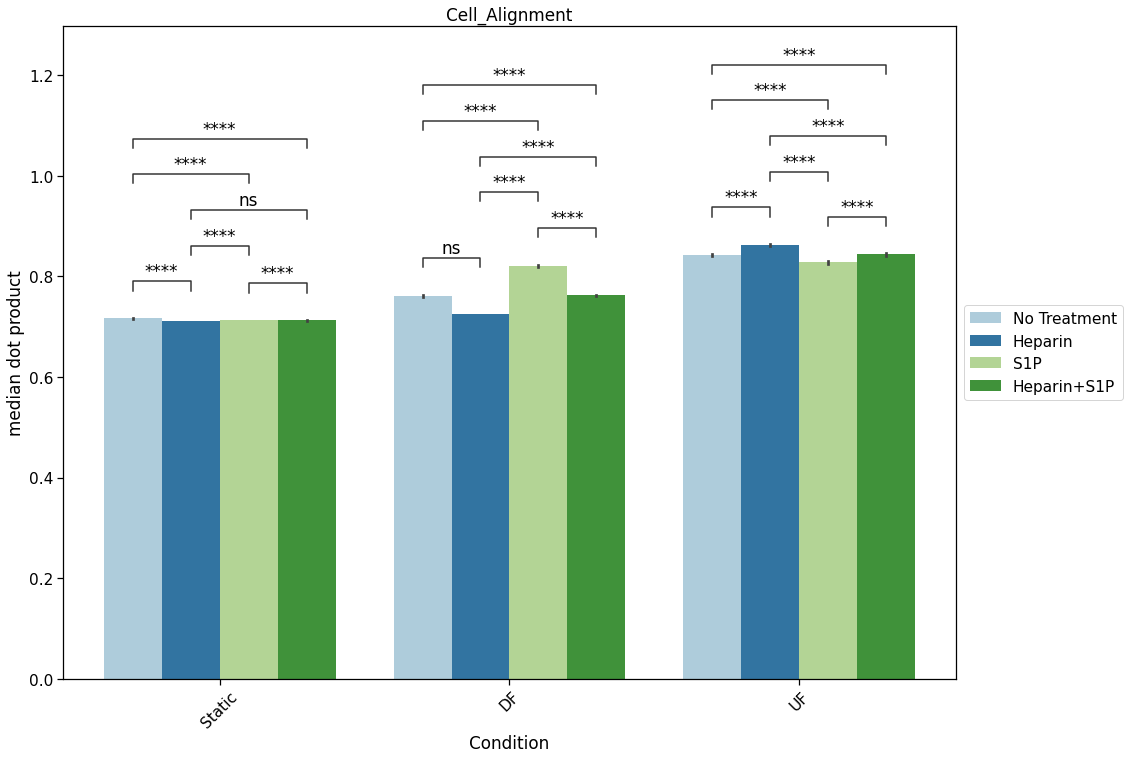

In [109]:
plot_df = expanded_df



pairs = []
p_vals = []
for (i, j) in combinations(plot_df['treatment'].unique(), 2):
    for flow in plot_df['flow'].unique():
        subset1 = plot_df[(plot_df['treatment'] == i) & (plot_df['flow'] == flow)]['median_dot']
        subset2 = plot_df[(plot_df['treatment'] == j) & (plot_df['flow'] == flow)]['median_dot']
        pairs.append(((flow,i),(flow,j)))
        _, p_value = mannwhitneyu(subset1, subset2)
        p_vals.append(p_value)


plotting_parameters = {
    'x': 'flow',
    'y': 'median_dot',
    'hue': 'treatment',
    'data': plot_df,
    'order': ['Static', 'DF', 'UF'],
    'palette': 'Paired'
}

#pairs = pairs
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in p_vals]

plt.figure(figsize = [16,12])
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    #ax = get_log_ax()

    # Plot with seaborn
    ax = sns.barplot(**plotting_parameters)
    

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(p_vals)
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()

    # Label and show
    #label_plot_for_subcats(ax)
    plt.xlabel('Condition')
    plt.ylabel('median dot product')
    plt.title('Cell_Alignment')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['No Treatment', 'Heparin', 'S1P', 'Heparin+S1P']
    ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

UF_Albumin bound S1P vs. UF_Heparin S1P: Custom statistical test, P_val:2.707e-62
UF_No Treatment vs. UF_Heparin 2 UmL: Custom statistical test, P_val:1.489e-61
DF_Albumin bound S1P vs. DF_Heparin S1P: Custom statistical test, P_val:5.011e-161
Static_Albumin bound S1P vs. Static_Heparin S1P: Custom statistical test, P_val:2.860e-17
Static_No Treatment vs. Static_Heparin 2 UmL: Custom statistical test, P_val:7.960e-38
Static_Heparin 2 UmL vs. Static_Albumin bound S1P: Custom statistical test, P_val:1.084e-13
DF_No Treatment vs. DF_Heparin 2 UmL: Custom statistical test, P_val:1.725e-01
DF_Heparin 2 UmL vs. DF_Albumin bound S1P: Custom statistical test, P_val:0.000e+00
UF_Heparin 2 UmL vs. UF_Albumin bound S1P: Custom statistical test, P_val:6.659e-41
UF_Heparin 2 UmL vs. UF_Heparin S1P: Custom statistical tes

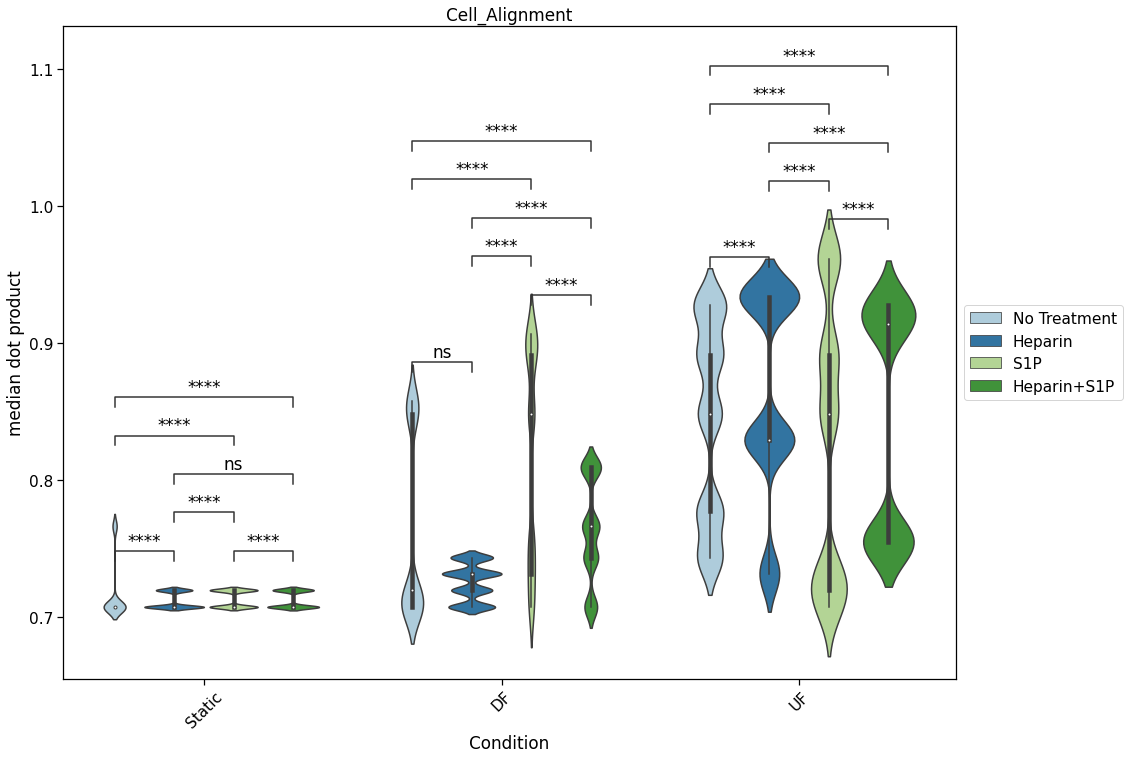

In [87]:
plot_df = expanded_df



pairs = []
p_vals = []
for (i, j) in combinations(plot_df['treatment'].unique(), 2):
    for flow in plot_df['flow'].unique():
        subset1 = plot_df[(plot_df['treatment'] == i) & (plot_df['flow'] == flow)]['median_dot']
        subset2 = plot_df[(plot_df['treatment'] == j) & (plot_df['flow'] == flow)]['median_dot']
        pairs.append(((flow,i),(flow,j)))
        _, p_value = mannwhitneyu(subset1, subset2)
        p_vals.append(p_value)


plotting_parameters = {
    'x': 'flow',
    'y': 'median_dot',
    'hue': 'treatment',
    'data': plot_df,
    'order': ['Static', 'DF', 'UF'],
    'palette': 'Paired'
}

#pairs = pairs
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in p_vals]

plt.figure(figsize = [16,12])
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    #ax = get_log_ax()

    # Plot with seaborn
    ax = sns.violinplot(**plotting_parameters)
    

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(p_vals)
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()

    # Label and show
    #label_plot_for_subcats(ax)
    plt.xlabel('Condition')
    plt.ylabel('median dot product')
    plt.title('Cell_Alignment')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['No Treatment', 'Heparin', 'S1P', 'Heparin+S1P']
    ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

UF_Albumin bound S1P vs. UF_Heparin S1P: Custom statistical test, P_val:3.787e-14
UF_No Treatment vs. UF_Heparin 2 UmL: Custom statistical test, P_val:4.819e-34
DF_Albumin bound S1P vs. DF_Heparin S1P: Custom statistical test, P_val:0.000e+00
Static_Albumin bound S1P vs. Static_Heparin S1P: Custom statistical test, P_val:3.398e-05
Static_No Treatment vs. Static_Heparin 2 UmL: Custom statistical test, P_val:1.300e-26
Static_Heparin 2 UmL vs. Static_Albumin bound S1P: Custom statistical test, P_val:4.189e-20
DF_No Treatment vs. DF_Heparin 2 UmL: Custom statistical test, P_val:1.402e-175
DF_Heparin 2 UmL vs. DF_Albumin bound S1P: Custom statistical test, P_val:0.000e+00
UF_Heparin 2 UmL vs. UF_Albumin bound S1P: Custom statistical test, P_val:2.130e-77
UF_Heparin 2 UmL vs. UF_Heparin S1P: Custom statistical tes

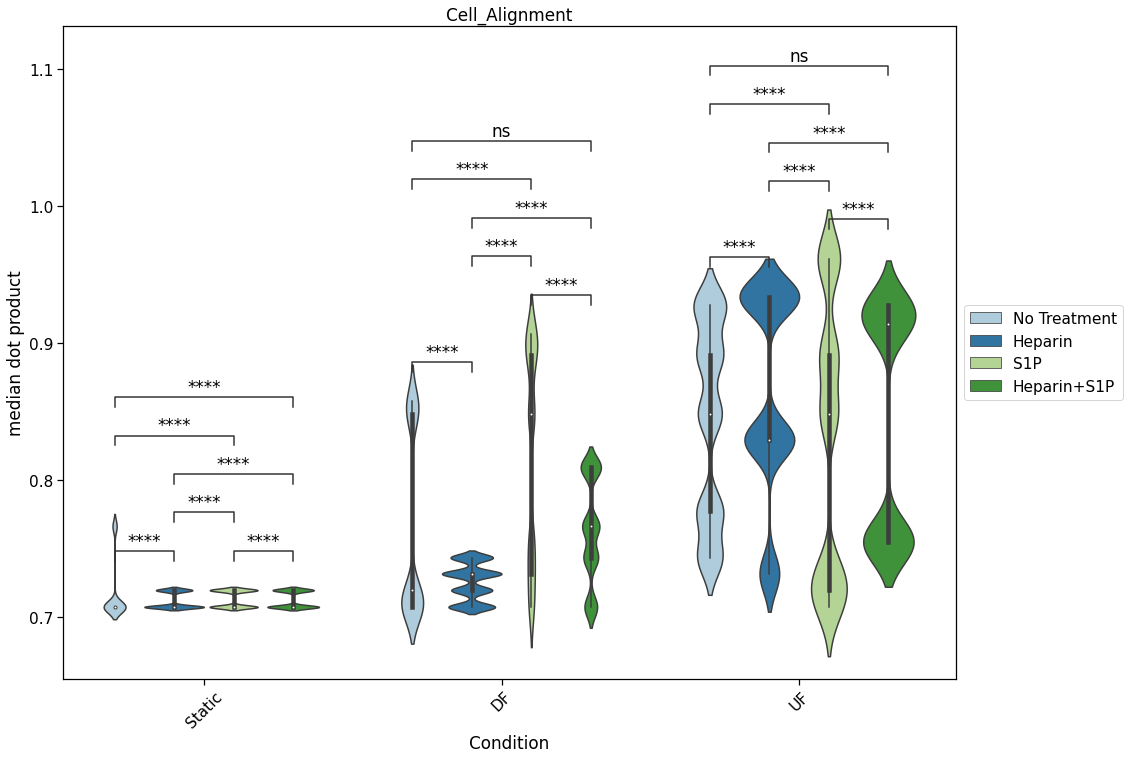

In [98]:



plot_df = expanded_df



pairs = []
p_vals = []
for (i, j) in combinations(plot_df['treatment'].unique(), 2):
    for flow in plot_df['flow'].unique():
        subset1 = plot_df[(plot_df['treatment'] == i) & (plot_df['flow'] == flow)]['median_dot']
        subset2 = plot_df[(plot_df['treatment'] == j) & (plot_df['flow'] == flow)]['median_dot']
        pairs.append(((flow,i),(flow,j)))
        #_, p_value = mannwhitneyu(subset1, subset2)
        _, p_value = ttest_ind(subset1, subset2, equal_var=False)  # Using Welch's t-test
        p_vals.append(p_value)


plotting_parameters = {
    'x': 'flow',
    'y': 'median_dot',
    'hue': 'treatment',
    'data': plot_df,
    'order': ['Static', 'DF', 'UF'],
    'palette': 'Paired'
}

#pairs = pairs
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in p_vals]

plt.figure(figsize = [16,12])
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    #ax = get_log_ax()

    # Plot with seaborn
    ax = sns.violinplot(**plotting_parameters)
    

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(p_vals)
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()

    # Label and show
    #label_plot_for_subcats(ax)
    plt.xlabel('Condition')
    plt.ylabel('median dot product')
    plt.title('Cell_Alignment')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['No Treatment', 'Heparin', 'S1P', 'Heparin+S1P']
    ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

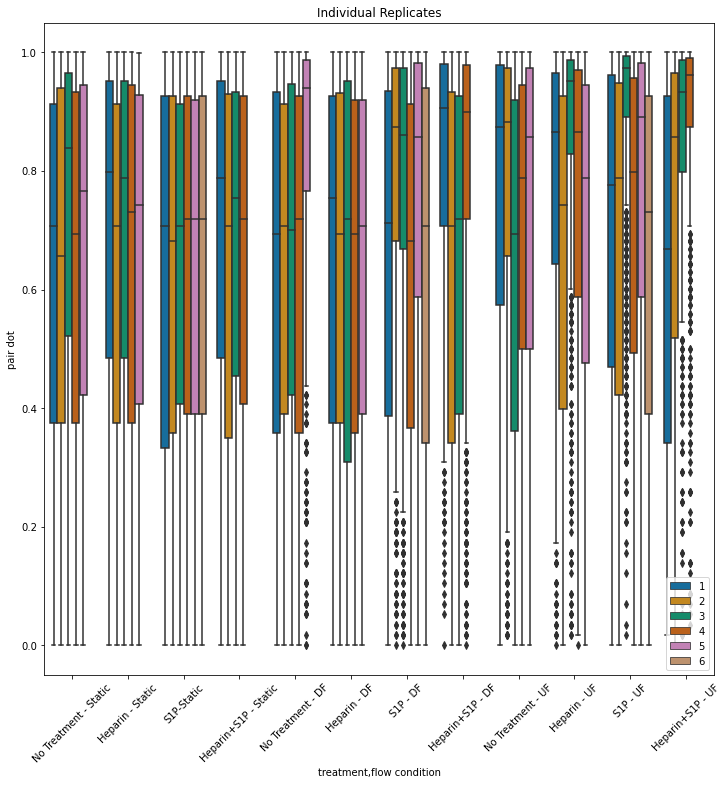

In [151]:
plt.figure(figsize = [12,12])
ax = sns.boxplot(x='g_name', y='pair_dot', hue='replicate', data=expanded_df,palette = "colorblind",order = names_order)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('pair dot')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

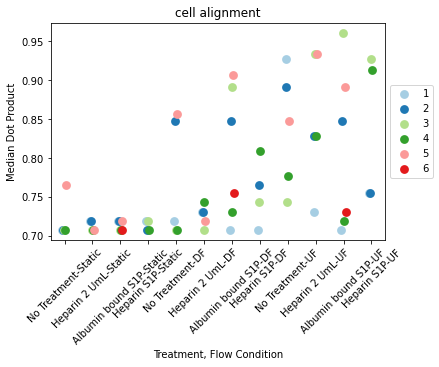

In [155]:
# plt.figure(figsize = [12,12])
# ax = sns.boxplot(x='g_name', y='rad-rad_avg', hue='replicate', data=elong_df,palette = "colorblind",order = names_order)
# # Customize the plot
# plt.xlabel('treatment,flow condition')
# plt.ylabel('OOP')
# plt.title('Individual Replicates')
# ax.set_xticklabels(names_simp, rotation=45);
# plt.legend(loc='lower right')

ax = sns.pointplot(x='g_name', y='median_dot', hue='replicate', data=expanded_df, 
                   order=names_order, palette="Paired", 
                   capsize=.1, errwidth=1, scale=1, markers='o', 
                   join=False, dodge=True, yerr='std_dot')

# Customize the plot
plt.xlabel('Treatment, Flow Condition')
plt.ylabel('Median Dot Product')
plt.title('cell alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

plt.show()

## get the dot product of the vectors as a function of distance

In [8]:
def get_orientation_diff(x, y):
        hp = np.pi / 2
        diff = x - y
        if diff > hp:
            diff -= np.pi
        elif diff < -hp:
            diff += np.pi 
        return abs(diff)

In [40]:
unique_exp_nums = elong_df['exp_num'].unique()

# Initialize an empty list to store the modified dataframes for each experiment
modified_dfs = []

# Loop over each unique experiment number
for exp_num in unique_exp_nums:
    # Filter the dataframe for the current experiment number
    e = elong_df[elong_df['exp_num'] == exp_num].copy()
    
    # Extract 'center' and 'rad' columns
    centers = e['center'].tolist()
    rads = e['rad'].tolist()
    
    # Calculate pairwise Euclidean distances for 'center' column
    distances_center = squareform(pdist(np.array(centers), metric='euclidean'))
    
    # Define the custom function
    
    # Calculate pairwise orient differences for 'rad' column
    distances_rad = pdist(np.array(rads)[:, np.newaxis], lambda u, v: get_orientation_diff(u[0], v[0]))
    distances_rad_matrix = squareform(distances_rad)
    pairwise_dot_matrix = np.cos(distances_rad_matrix)
    
    
    
#     # Calculate the average along the pairwise orient difference for each row
#     average_orient_diff = np.median(distances_rad_matrix,axis=1)
    
#     # Add this information back to the experiment dataframe
#     e['avg_orient_diff_rad'] = average_orient_diff
#     e['avg_rad'] = average_angle(rads)
    
#     # Append the modified dataframe to the list
#     modified_dfs.append(e)

In [41]:
def get_orrient_diff(x,y):
    hp = np.pi/2
    if x-y > hp:
        y +=np.pi
    return x-y

In [43]:
e1 = elong_df[elong_df['exp_num']==0].copy()

centers = e1['center'].tolist()
rads = e1['rad'].tolist()

distances_center = squareform(pdist(np.array(centers), metric='euclidean'))

def get_orrient_diff(x, y):
    hp = np.pi / 2
    if x - y > hp:
        y += np.pi
    return x - y

distances_rad = pdist(np.array(rads)[:, np.newaxis], lambda u, v: get_orrient_diff(u[0], v[0]))
distances_rad_matrix = squareform(distances_rad)

average_orient_diff = distances_rad_matrix.mean(axis=1)

e1['avg_orient_diff_rad'] = np.abs(average_orient_diff)

(array([  4.,   4.,   9.,  12.,  34.,  72., 442., 234.,  33.,  15.]),
 array([-1.59145989, -1.36201512, -1.13257036, -0.9031256 , -0.67368084,
        -0.44423607, -0.21479131,  0.01465345,  0.24409821,  0.47354298,
         0.70298774]),
 <BarContainer object of 10 artists>)

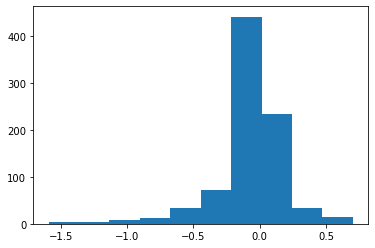

In [46]:
plt.hist(average_orient_diff)

In [142]:
def average_angle(angles):
    # Convert all angles to be between -pi/2 and pi/2
    angles = np.array(angles) % np.pi
    angles[angles > np.pi / 2] -= np.pi
    
    # Separate angles into two quadrants
    lower_quadrant = angles[angles <= 0]
    upper_quadrant = angles[angles > 0]
    
    # Calculate the average angle in each quadrant
    avg_lower = np.mean(lower_quadrant) if len(lower_quadrant) > 0 else 0
    avg_upper = np.mean(upper_quadrant) if len(upper_quadrant) > 0 else 0
    
    # Check the difference between the two averages
    diff = avg_upper - avg_lower
    
    if np.abs(diff) < np.pi / 2:
        # If the difference is less than pi/2, compute the weighted average
        total_count = len(upper_quadrant) + len(lower_quadrant)
        return (avg_lower * len(lower_quadrant) + avg_upper * len(upper_quadrant)) / total_count
    else:
        # If the difference is greater than or equal to pi/2, adjust the lower quadrant angle by pi
        adjusted_lower = avg_lower + np.pi
        total_count = len(upper_quadrant) + len(lower_quadrant)
        return (adjusted_lower * len(lower_quadrant) + avg_upper * len(upper_quadrant)) / total_count

In [171]:
unique_exp_nums = elong_df['exp_num'].unique()

# Initialize an empty list to store the modified dataframes for each experiment
modified_dfs = []

# Loop over each unique experiment number
for exp_num in unique_exp_nums:
    # Filter the dataframe for the current experiment number
    e = elong_df[elong_df['exp_num'] == exp_num].copy()
    
    # Extract 'center' and 'rad' columns
    centers = e['center'].tolist()
    rads = e['rad'].tolist()
    
    # Calculate pairwise Euclidean distances for 'center' column
    distances_center = squareform(pdist(np.array(centers), metric='euclidean'))
    
    # Define the custom function
    
    
    # Calculate pairwise orient differences for 'rad' column
    distances_rad = pdist(np.array(rads)[:, np.newaxis], lambda u, v: get_orientation_diff(u[0], v[0]))
    distances_rad_matrix = squareform(distances_rad)
    
    # Calculate the average along the pairwise orient difference for each row
    average_orient_diff = np.median(distances_rad_matrix,axis=1)
    
    # Add this information back to the experiment dataframe
    e['avg_orient_diff_rad'] = average_orient_diff
    e['avg_rad'] = average_angle(rads)
    
    # Append the modified dataframe to the list
    modified_dfs.append(e)

# Concatenate all the modified dataframes together
elong_df = pd.concat(modified_dfs, ignore_index=True)


def get_orientation_diff(x, y):
        hp = np.pi / 2
        diff = x - y
        if diff > hp:
            diff -= np.pi
        elif diff < -hp:
            diff += np.pi 
        return abs(diff)
    
def get_orientation_diff_arr(x, y):
    hp = np.pi / 2
    diff = x - y
    diff = np.where(diff > hp, diff - np.pi, diff)
    diff = np.where(diff < -hp, diff + np.pi, diff)
    return np.abs(diff)

def get_oop_arr(x):
    return 2*np.cos(x)**2

elong_df['rad-rad_avg'] = get_orientation_diff_arr(np.array(elong_df['rad'].tolist()), np.array(elong_df['avg_rad'].tolist()))
elong_df['oop_bar2'] = get_oop_arr(elong_df['rad-rad_avg'])

In [145]:
# import numpy as np

# def get_orientation_diff(x, y):
#     hp = np.pi / 2
#     diff = x - y
    
#     if diff > hp:
#         diff -= np.pi
#     elif diff < -hp:
#         diff += np.pi
        
#     return abs(diff)

# # Test the function
# angle1 = np.pi/2 - 0.1
# angle2 = -np.pi/2 + 0.1
# print(get_orientation_diff(angle1, angle2)) 

In [146]:


# def average_angle(angles):
#     # Convert each angle to its equivalent acute angle and account for bidirectional nature
#     acute_angles = np.abs(angles) % (np.pi / 2)
    
#     # Calculate the equivalent direction vector for each acute angle
#     x = np.cos(2 * acute_angles)
#     y = np.sin(2 * acute_angles)
    
#     # Calculate the average vector and then convert back to the angle, dividing by 2
#     mean_x = np.mean(x)
#     mean_y = np.mean(y)
#     avg_angle = np.arctan2(mean_y, mean_x) / 2
    
#     return avg_angle

# # Test the function
# angles1 = [np.pi/2 - 0.1, -np.pi/2 + 0.1]
# print(average_angle(angles1))  # Output should be close to 0.1

# angles2 = [0.1, -0.1]
# print(average_angle(angles2))

In [136]:
import numpy as np



# Test the function
angles1 = [np.pi/2 - 0.1, -np.pi/2 + 0.1]
print(average_angle(angles1))  # Output should be close to 0.1

angles2 = [0.1, -0.1]
print(average_angle(angles2))  # Output should be close to 0


1.5707963267948966
-4.163336342344337e-17


In [140]:
ang = elong_df[elong_df['exp_num']==19]['rad']

average_angle(ang)

1.562069680534925

(array([ 88.,  74.,  67.,  43.,  40.,  49.,  45.,  54.,  74., 100.]),
 array([-1.57079633, -1.25663706, -0.9424778 , -0.62831853, -0.31415927,
         0.        ,  0.31415927,  0.62831853,  0.9424778 ,  1.25663706,
         1.57079633]),
 <BarContainer object of 10 artists>)

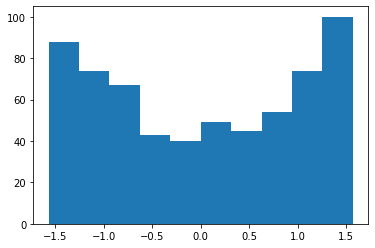

In [157]:
plt.hist(elong_df[elong_df['exp_num']==19]['rad'])

(array([333., 198., 113.,  82.,  46.,  23.,  23.,  12.,  15.,  14.]),
 array([0.00249913, 0.15733361, 0.31216809, 0.46700256, 0.62183704,
        0.77667152, 0.93150599, 1.08634047, 1.24117495, 1.39600942,
        1.5508439 ]),
 <BarContainer object of 10 artists>)

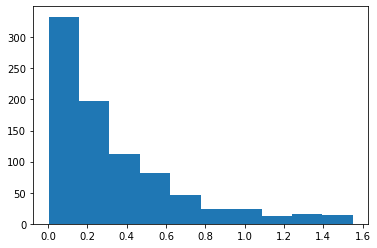

In [165]:
plt.hist(elong_df[elong_df['exp_num']==0]['rad-rad_avg'])

## old code


In [123]:
gnames = master_df['g_name'].unique()
gnames

array(['No Treatment-UF', 'No Treatment-DF', 'No Treatment-Static',
       'Heparin 2 UmL-UF', 'Heparin 2 UmL-Static', 'Heparin 2 UmL-DF',
       'Albumin bound S1P-Static', 'Albumin bound S1P-UF',
       'Albumin bound S1P-DF', 'Heparin S1P-UF', 'Heparin S1P-DF',
       'Heparin S1P-Static'], dtype=object)

In [124]:
#names_order = [gnames[1],gnames[3],gnames[8],gnames[2],gnames[5],gnames[7],gnames[0],gnames[4],gnames[6]]

In [149]:
names_order = ['No Treatment-Static',
               'Heparin 2 UmL-Static',
 'Albumin bound S1P-Static',
 'Heparin S1P-Static',
               'No Treatment-DF',
 'Heparin 2 UmL-DF',
 'Albumin bound S1P-DF',
 'Heparin S1P-DF',
               'No Treatment-UF',
 'Heparin 2 UmL-UF',
 'Albumin bound S1P-UF',
 'Heparin S1P-UF']

names_simp = ['No Treatment - Static',
    'Heparin - Static',
 'S1P-Static',
 'Heparin+S1P - Static',
              'No Treatment - DF',
 'Heparin - DF',
 'S1P - DF',
 'Heparin+S1P - DF',
              'No Treatment - UF',
 'Heparin - UF',
 'S1P - UF',
 'Heparin+S1P - UF']

In [127]:


# plt.figure(figsize = [12,12])
# ax = sns.barplot(x='g_name', y='oop_bar', hue='age', data=elong_df,order = names_order)
# # Customize the plot
# plt.xlabel('treatment,flow condition')
# plt.ylabel('OOP')
# plt.title('Grouped Box Plots')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.legend(loc='lower right')


In [128]:
# e1_df = elong_df[elong_df['exp_num']==1].copy()
# e1_df.columns

In [129]:
# r90 = e1_df['rot90']
# plt.hist(r90)

# x = y = 0
# for r in r90:
#     y+=np.sin(np.deg2rad(r))
#     x+=np.cos(np.deg2rad(r))
# np.rad2deg(np.arctan2(y,x))

In [130]:
# e19_df = elong_df[elong_df['exp_num']==19].copy()

# r90 = e19_df['rot90']
# plt.hist(r90,bins = 20)

# x = y = 0
# for r in r90:
#     y+=np.sin(np.deg2rad(r))
#     x+=np.cos(np.deg2rad(r))
# np.rad2deg(np.arctan2(y,x))

In [166]:
g_names = elong_df['g_name'].unique()
g_names

array(['No Treatment-UF', 'No Treatment-DF', 'No Treatment-Static',
       'Heparin 2 UmL-UF', 'Heparin 2 UmL-Static', 'Heparin 2 UmL-DF',
       'Albumin bound S1P-Static', 'Albumin bound S1P-UF',
       'Albumin bound S1P-DF', 'Heparin S1P-UF', 'Heparin S1P-DF',
       'Heparin S1P-Static'], dtype=object)

In [167]:
{gn:elong_df[elong_df['g_name'] == gn]['replicate'].unique() for gn in g_names}

{'No Treatment-UF': array([1, 5, 2, 3, 4]),
 'No Treatment-DF': array([1, 5, 2, 3, 4]),
 'No Treatment-Static': array([1, 5, 2, 3, 4]),
 'Heparin 2 UmL-UF': array([4, 1, 2, 3, 5]),
 'Heparin 2 UmL-Static': array([4, 1, 2, 3, 5]),
 'Heparin 2 UmL-DF': array([4, 1, 2, 3, 5]),
 'Albumin bound S1P-Static': array([4, 6, 2, 5, 3, 1]),
 'Albumin bound S1P-UF': array([4, 6, 2, 5, 3, 1]),
 'Albumin bound S1P-DF': array([4, 6, 2, 5, 3, 1]),
 'Heparin S1P-UF': array([1, 3, 4, 2]),
 'Heparin S1P-DF': array([1, 3, 4, 2]),
 'Heparin S1P-Static': array([1, 3, 4, 2])}

In [168]:
#master_df[master_df['exp_num']==0].unique()

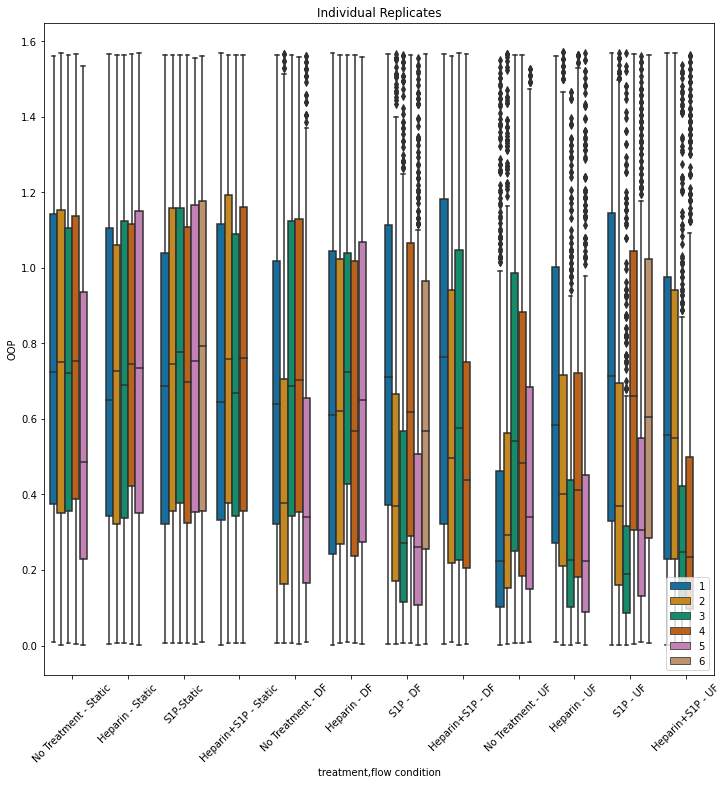

In [172]:
plt.figure(figsize = [12,12])
ax = sns.boxplot(x='g_name', y='rad-rad_avg', hue='replicate', data=elong_df,palette = "colorblind",order = names_order)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('OOP')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

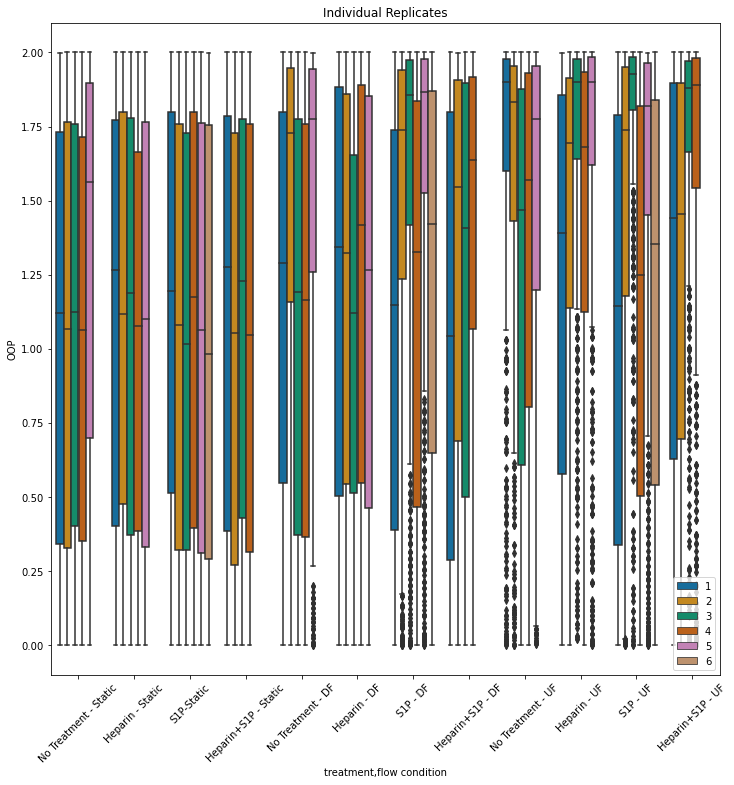

In [173]:
plt.figure(figsize = [12,12])
ax = sns.boxplot(x='g_name', y='oop_bar2', hue='replicate', data=elong_df,palette = "colorblind",order = names_order)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('OOP')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

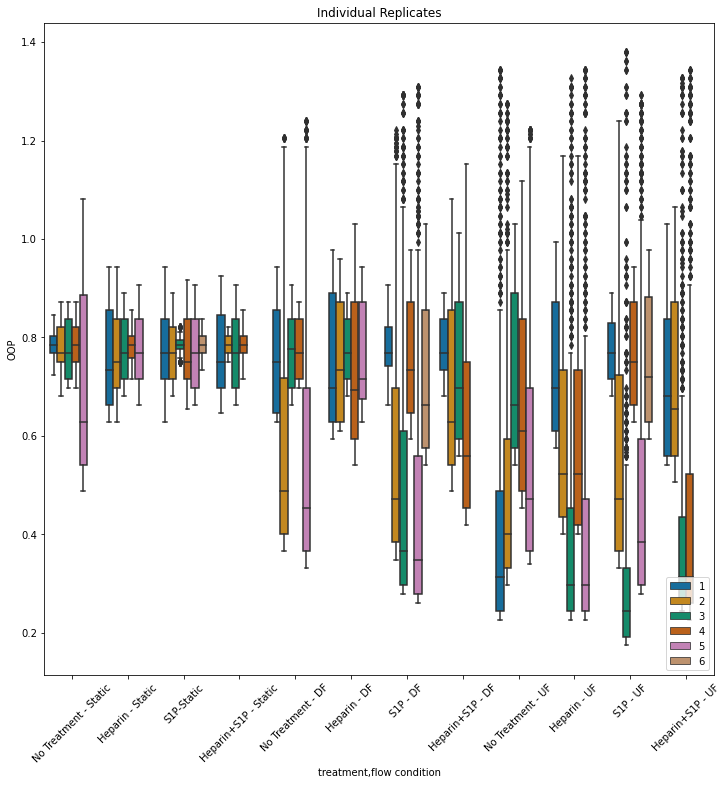

In [134]:
plt.figure(figsize = [12,12])
ax = sns.boxplot(x='g_name', y='avg_orient_diff_rad', hue='replicate', data=elong_df,palette = "colorblind",order = names_order)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('OOP')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

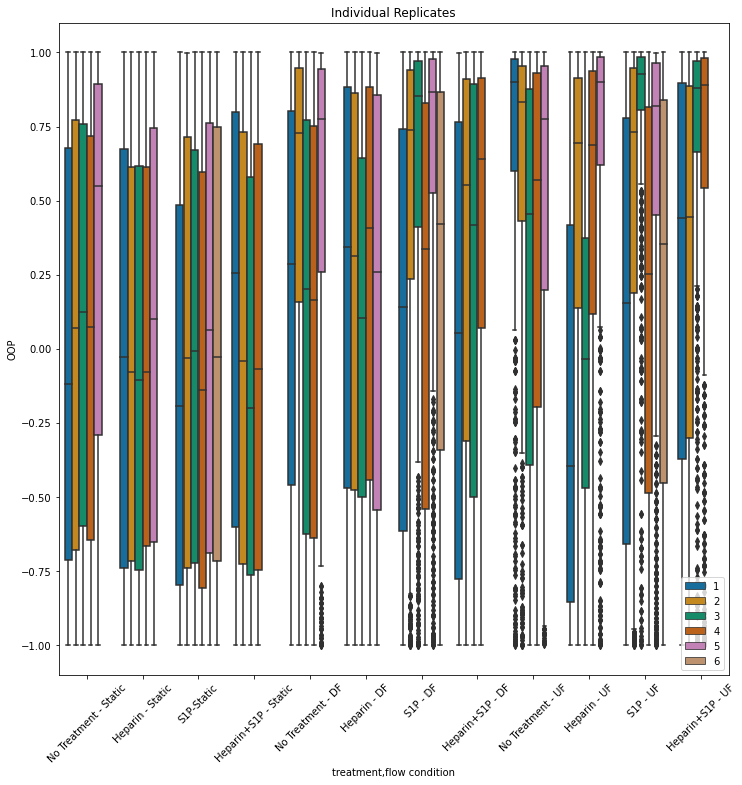

In [57]:
plt.figure(figsize = [12,12])
ax = sns.boxplot(x='g_name', y='oop_bar', hue='replicate', data=elong_df,order = names_order,palette = "colorblind")
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('OOP')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

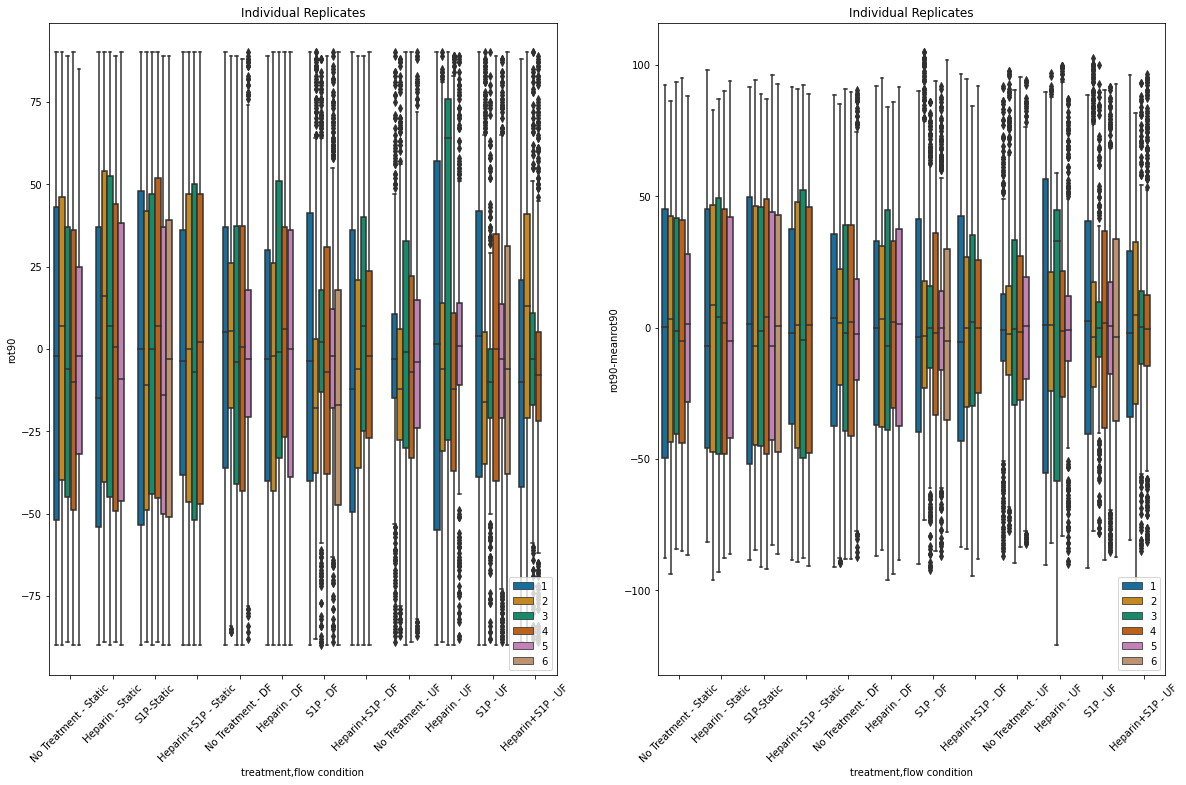

In [46]:
plt.figure(figsize = [20,12])
plt.subplot(1,2,1)
ax = sns.boxplot(x='g_name', y='rot90', hue='replicate', data=elong_df,order = names_order,palette = "colorblind")
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('rot90')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')
plt.subplot(1,2,2)
ax = sns.boxplot(x='g_name', y='rot90-rot90_bar', hue='replicate', data=elong_df,order = names_order,palette = "colorblind")
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('rot90-meanrot90')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

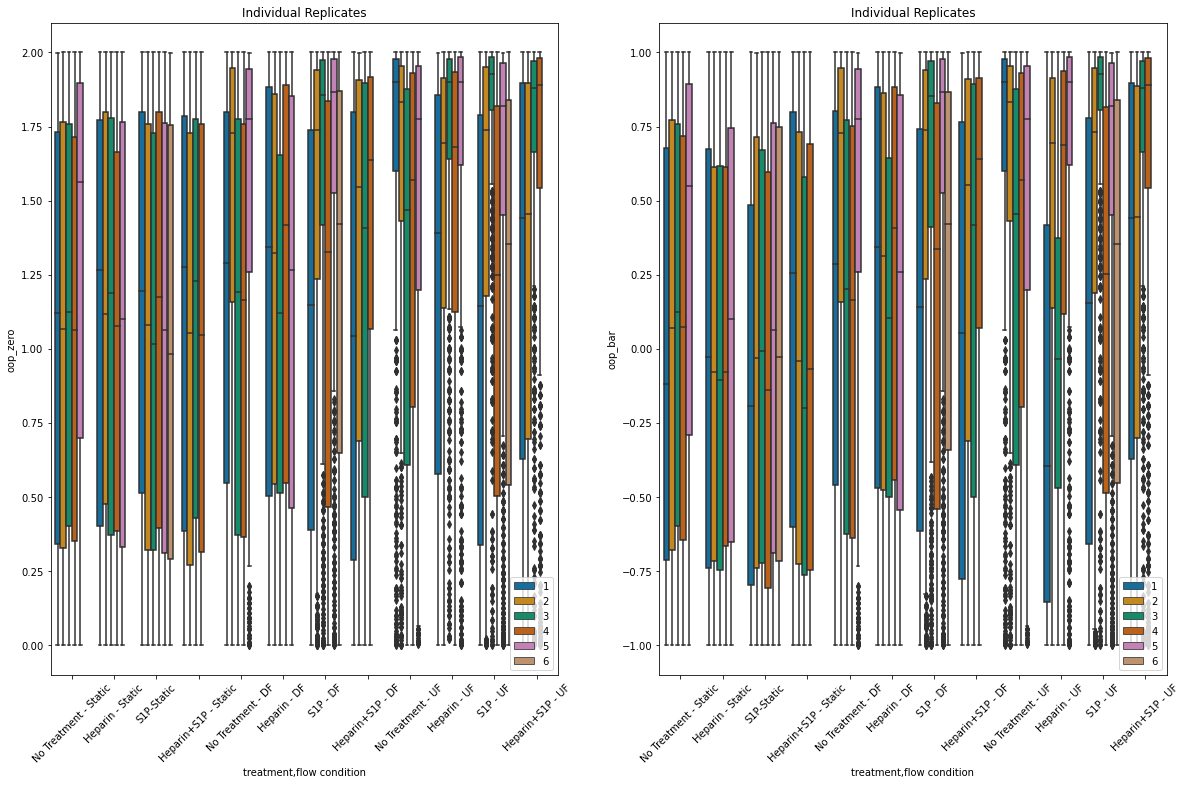

In [174]:
plt.figure(figsize = [20,12])
plt.subplot(1,2,1)
ax = sns.boxplot(x='g_name', y='oop_bar2', hue='replicate', data=elong_df,order = names_order,palette = "colorblind")
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('oop_zero')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')
plt.subplot(1,2,2)
ax = sns.boxplot(x='g_name', y='oop_bar', hue='replicate', data=elong_df,order = names_order,palette = "colorblind")
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('oop_bar')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

In [48]:
elong_df[(elong_df['replicate']==3) & (elong_df['g_name']=='Heparin 2 UmL-UF')]['date'].unique()
#elong_df[(elong_df['treatment'] == i) & (elong_df['flow'] == flow)]['oop_bar']

array([2723])

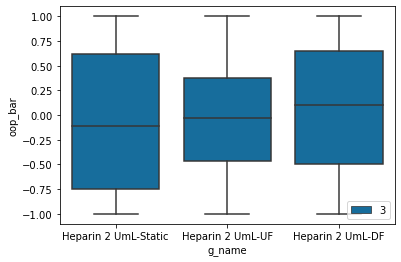

In [49]:
# data from 2723 

date_df = elong_df[(elong_df['date']==2723)]
date_df

ax = sns.boxplot(x='g_name', y='oop_bar', hue='replicate', data=date_df,palette = "colorblind")
# Customize the plot
#ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

## sample from a replicate that has cells perpendicular to flow

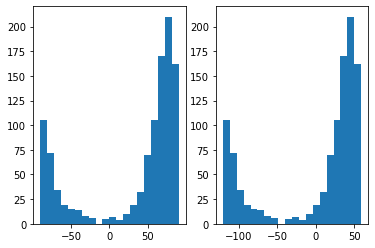

In [50]:
H_UF_2723 = elong_df[(elong_df['replicate']==3) & (elong_df['g_name']=='Heparin 2 UmL-UF')]#['date'].unique()

plt.subplot(1,2,1)
plt.hist(H_UF_2723['rot90'],bins = 20);
plt.subplot(1,2,2)
plt.hist(H_UF_2723['rot90-rot90_bar'],bins = 20);


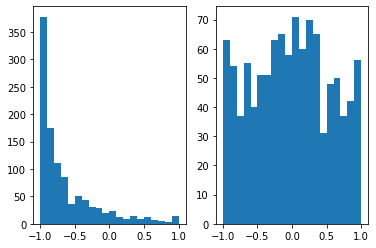

In [51]:
H_UF_2723 = elong_df[(elong_df['replicate']==3) & (elong_df['g_name']=='Heparin 2 UmL-UF')]#['date'].unique()
plt.subplot(1,2,1)
plt.hist(2*np.cos(np.deg2rad(H_UF_2723['rot90']))**2-1,bins = 20);
plt.subplot(1,2,2)
plt.hist(2*np.cos(np.deg2rad(H_UF_2723['rot90-rot90_bar']))**2-1,bins = 20);

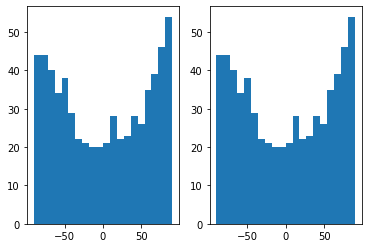

In [52]:
H_UF_2723 = elong_df[(elong_df['replicate']==1) & (elong_df['g_name']=='Heparin 2 UmL-UF')]#['date'].unique()
plt.subplot(1,2,1)
plt.hist(H_UF_2723['rot90'],bins = 20);
plt.subplot(1,2,2)
plt.hist(H_UF_2723['rot90-rot90_bar'],bins = 20);


In [58]:
len(H_UF_2723)

634

In [39]:
[elong_df[elong_df['g_name']==n]['rot90_bar'].unique() for n in names_order]

[array([-2.3637931 , -3.35609756,  3.65753425, -4.62264151, -5.08734403]),
 array([-1.21153846, -8.19139785,  7.23239437,  2.95267176, -3.85460993]),
 array([ 2.91098485, -3.80143113, -4.1568    , -7.19908467,  1.22406639,
        -1.5751503 ]),
 array([-1.57442748, -2.2352    ,  0.90921228, -0.81765557]),
 array([ 1.29485179, -0.48500882,  3.68670886, -1.79642857, -1.80057803]),
 array([ 3.9200542 , -2.99002494, -5.15772871,  6.02093596, -1.52521008]),
 array([ -4.88809947, -12.02097902, -14.78016086,  -1.89460784,
          2.18886199,  -0.10515873]),
 array([-6.51412429,  4.68576105, -2.02836879, -5.75944056]),
 array([-2.14318976, -4.46728972, -9.74068768, -0.43730887, -5.375     ]),
 array([-10.70689655,   0.35173502,  -7.00723888,  31.01968135,
          1.87896592]),
 array([ -1.6562986 ,  -2.60807292, -12.55064028,  -3.47762864,
         -9.88475499,   1.54045307]),
 array([-8.07559055, -3.14047619, -7.55852843,  8.24941725])]

## unused plots

In [13]:
# mean_std_df = master_df.groupby(['g_name', 'replicate']).agg(['mean', 'std']).reset_index()

# # Plot the means with error bars representing the standard deviations
# ax = sns.pointplot(x='g_name', y=('oop_bar', 'mean'), hue='replicate', data=mean_std_df, ci=None)
# ax.errorbar(mean_std_df['g_name'], mean_std_df[('oop_bar', 'mean')], yerr=mean_std_df[('oop_bar', 'std')], fmt='none', capsize=5, linewidth=1, color='black')

# # Customize the plot
# plt.xlabel('Group')
# plt.ylabel('Mean Value')
# plt.title('Means and Standard Deviations')

# # Rotate the category labels and move the legend
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.legend(loc='lower right')


In [14]:
# plt.figure(figsize = [12,12])
# ax = sns.stripplot(x='g_name', y=('oop_bar', 'mean'), hue='replicate', data=mean_std_df, jitter=True, dodge=True, size=10, linewidth=1)
# for i, (_, row) in enumerate(mean_std_df.iterrows()):
#     group = row['g_name']
#     mean = row[('oop_bar', 'mean')]
#     std = row[('oop_bar', 'std')]
#     ax.errorbar(group, mean, yerr=std, fmt='none', capsize=5, linewidth=1, color='black')
    
#     plt.xlabel('Group')
# plt.ylabel('Mean Value')
# plt.title('Means and Standard Deviations')

# # Rotate the category labels and move the legend
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
# plt.legend(loc='lower right')

In [15]:
# plt.figure(figsize = [12,12])
# ax = sns.boxplot(x='g_name', y='oop_bar', data=elong_df)
# # Customize the plot
# plt.xlabel('treatment,flow condition')
# plt.ylabel('OOP')
# plt.title('Grouped Box Plots')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.legend(loc='lower right')

In [16]:
# plt.figure(figsize = [12,12])
# ax = sns.boxplot(x='flow', y='oop_bar',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'])
# # Customize the plot
# plt.xlabel('treatment,flow condition')
# plt.ylabel('OOP')
# plt.title('Grouped Box Plots')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.legend(loc='lower right')

In [17]:
# plt.figure(figsize = [12,12])
# ax = sns.boxplot(x='flow', y='oop_bar',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
#                  palette = "Paired")
# #palette("hls", 8)
# # Customize the plot
# plt.xlabel('treatment,flow condition')
# plt.ylabel('OOP')
# plt.title('Grouped Box Plots')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.legend(loc='lower right')

In [18]:
# plt.figure(figsize = [12,12])
# ax = sns.boxplot(x='flow', y='oop_zero',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
#                  palette = "Paired")
# #palette("hls", 8)
# # Customize the plot
# plt.xlabel('treatment,flow condition')
# plt.ylabel('OOP')
# plt.title('Grouped Box Plots')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.legend(loc='lower right')

In [19]:
# plt.figure()
# ax = sns.boxplot(x='flow', y='oop_bar',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
#                  palette = "Paired")
# #palette("hls", 8)
# # Customize the plot
# plt.xlabel('treatment,flow condition')
# plt.ylabel('OOP')
# plt.title('Grouped Box Plots')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.legend(loc='lower right')

# plt.figure()
# ax = sns.boxplot(x='flow', y='oop_zero',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
#                  palette = "Paired")
# #palette("hls", 8)
# # Customize the plot
# plt.xlabel('treatment,flow condition')
# plt.ylabel('OOP')
# plt.title('Grouped Box Plots')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
# plt.legend(loc='lower right')

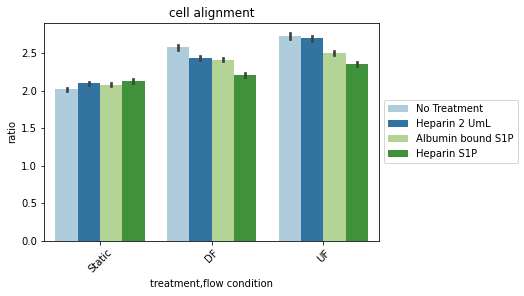

In [20]:
plt.figure()
ax = sns.barplot(x='flow', y='ratio',hue = 'treatment', data=master_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('ratio')
plt.title('cell aspect ratio')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


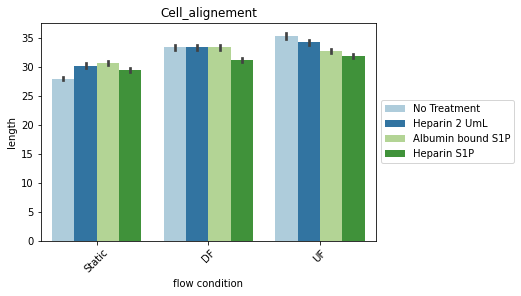

In [21]:
plt.figure()
ax = sns.barplot(x='flow', y='length',hue = 'treatment', data=master_df,order = ['Static','DF','UF'],
                 palette = "Paired")
#palette("hls", 8)
# Customize the plot
plt.xlabel('flow condition')
plt.ylabel('length')
plt.title('Cell length')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


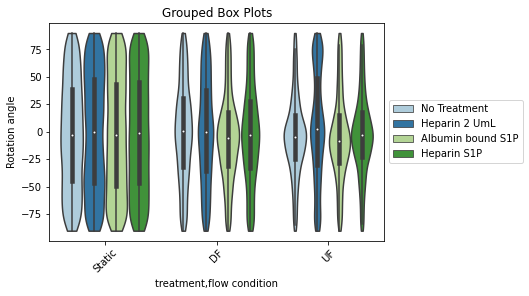

In [22]:
plt.figure()
ax = sns.violinplot(x='flow', y='rot90',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired",cut=0)

#palette("hls", 8)
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('Rotation angle')
plt.title('Grouped Box Plots')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


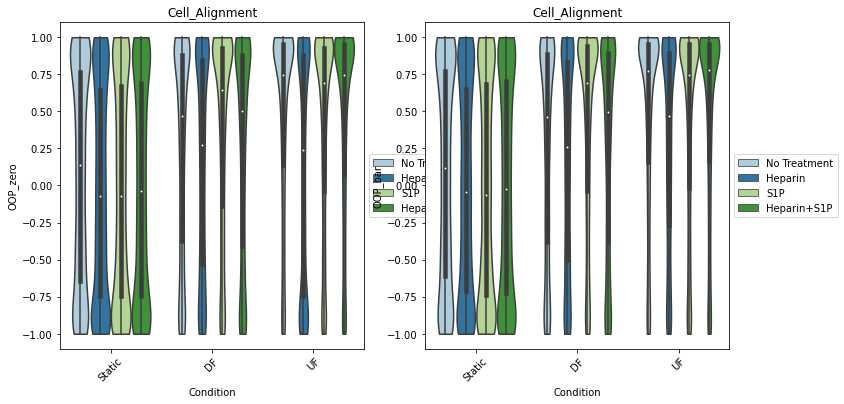

In [49]:
plt.figure(figsize = [12,6])
plt.subplot(1,2,1)
ax = sns.violinplot(x='flow', y='oop_zero',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired",cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP_zero')
plt.title('Cell_Alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

# Set the new labels for the legend
new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']

# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))


plt.subplot(1,2,2)
ax = sns.violinplot(x='flow', y='oop_bar',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired",cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP_bar')
plt.title('Cell_Alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

# Set the new labels for the legend
new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']

# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

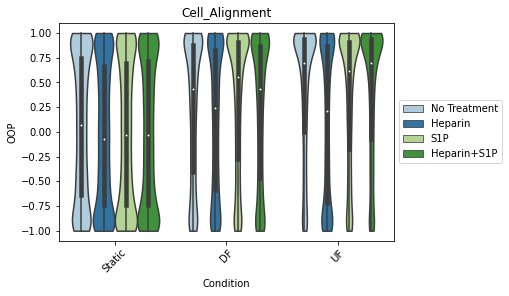

In [19]:
plt.figure()
ax = sns.violinplot(x='flow', y='oop_zero',hue = 'treatment', data=elong_df15,order = ['Static','DF','UF'],
                 palette = "Paired",cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP')
plt.title('Cell_Alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

# Set the new labels for the legend
new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']

# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

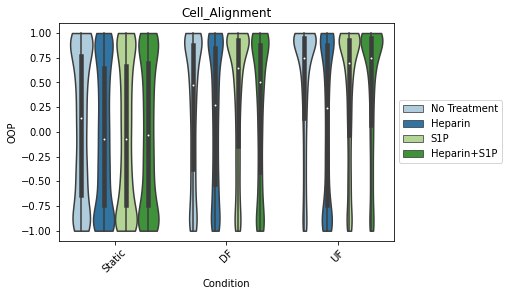

In [46]:
plt.figure()
ax = sns.violinplot(x='flow', y='oop_zero',hue = 'treatment', data=elong_df15,order = ['Static','DF','UF'],
                 palette = "Paired",cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP')
plt.title('Cell_Alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

# Set the new labels for the legend
new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']

# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

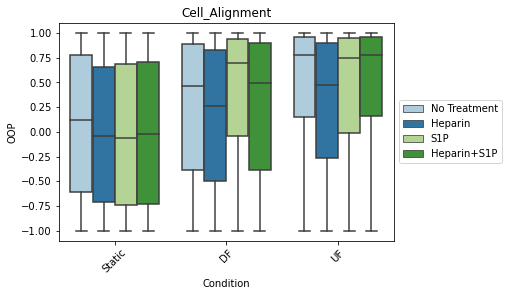

In [24]:
plt.figure()
ax = sns.boxplot(x='flow', y='oop_bar',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired")#,cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP')
plt.title('Cell_Alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']


# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

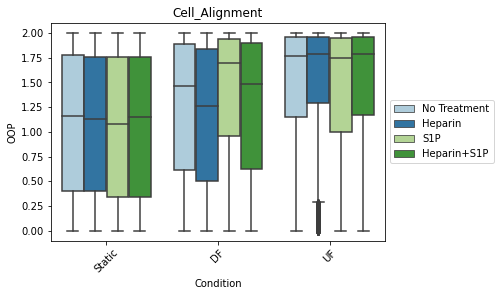

In [175]:
plt.figure()
ax = sns.boxplot(x='flow', y='oop_bar2',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired")#,cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP')
plt.title('Cell_Alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']


# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

In [46]:
# flow_groups = {'Static':elong_df[elong_df['flow']=='Static']['group'].unique(),
#                'DF':elong_df[elong_df['flow']=='DF']['group'].unique(),
#                'UF':elong_df[elong_df['flow']=='UF']['group'].unique()}

# flow = 'DF'
# flow_groups[flow]

# pairs = []
# p_vals = []
# for (i, j) in combinations(flow_groups['DF'], 2):
#     #print(i,j)
#     pairs.append((i,j))
#     subset1 = elong_df[(elong_df['group']==i)]['oop_bar']
#     subset2 = elong_df[(elong_df['group']==j)]['oop_bar']
#     _, p_value = mannwhitneyu(subset1, subset2)
#     p_vals.append(p_value)
# pairs

[(9, 3), (9, 0), (9, 6), (3, 0), (3, 6), (0, 6)]

In [176]:
pairs = []
pvals = []
for (i, j) in combinations(elong_df['treatment'].unique(), 2):
    for flow in elong_df['flow'].unique():
        subset1 = elong_df[(elong_df['treatment'] == i) & (elong_df['flow'] == flow)]['oop_bar2']
        subset2 = elong_df[(elong_df['treatment'] == j) & (elong_df['flow'] == flow)]['oop_bar2']
        pairs.append(((flow,i),(flow,j)))
        _, p_value = mannwhitneyu(subset1, subset2)
        pvals.append(p_value)
pairs

[(('UF', 'No Treatment'), ('UF', 'Heparin 2 UmL')),
 (('DF', 'No Treatment'), ('DF', 'Heparin 2 UmL')),
 (('Static', 'No Treatment'), ('Static', 'Heparin 2 UmL')),
 (('UF', 'No Treatment'), ('UF', 'Albumin bound S1P')),
 (('DF', 'No Treatment'), ('DF', 'Albumin bound S1P')),
 (('Static', 'No Treatment'), ('Static', 'Albumin bound S1P')),
 (('UF', 'No Treatment'), ('UF', 'Heparin S1P')),
 (('DF', 'No Treatment'), ('DF', 'Heparin S1P')),
 (('Static', 'No Treatment'), ('Static', 'Heparin S1P')),
 (('UF', 'Heparin 2 UmL'), ('UF', 'Albumin bound S1P')),
 (('DF', 'Heparin 2 UmL'), ('DF', 'Albumin bound S1P')),
 (('Static', 'Heparin 2 UmL'), ('Static', 'Albumin bound S1P')),
 (('UF', 'Heparin 2 UmL'), ('UF', 'Heparin S1P')),
 (('DF', 'Heparin 2 UmL'), ('DF', 'Heparin S1P')),
 (('Static', 'Heparin 2 UmL'), ('Static', 'Heparin S1P')),
 (('UF', 'Albumin bound S1P'), ('UF', 'Heparin S1P')),
 (('DF', 'Albumin bound S1P'), ('DF', 'Heparin S1P')),
 (('Static', 'Albumin bound S1P'), ('Static', 'Hepar

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

UF_Albumin bound S1P vs. UF_Heparin S1P: Custom statistical test, P_val:2.284e-03
UF_No Treatment vs. UF_Heparin 2 UmL: Custom statistical test, P_val:4.057e-03
DF_Albumin bound S1P vs. DF_Heparin S1P: Custom statistical test, P_val:8.968e-18
Static_Albumin bound S1P vs. Static_Heparin S1P: Custom statistical test, P_val:5.842e-01
Static_No Treatment vs. Static_Heparin 2 UmL: Custom statistical test, P_val:4.915e-01
Static_Heparin 2 UmL vs. Static_Albumin bound S1P: Custom statistical test, P_val:1.899e-01
DF_No Treatment vs. DF_Heparin 2 UmL: Custom statistical test, P_val:1.094e-07
DF_Heparin 2 UmL vs. DF_Albumin bound S1P: Custom statistical test, P_val:2.587e-56
UF_Heparin 2 UmL vs. UF_Albumin bound S1P: Custom statistical test, P_val:1.460e-09
UF_Heparin 2 UmL vs. UF_Heparin S1P: Custom statistical test

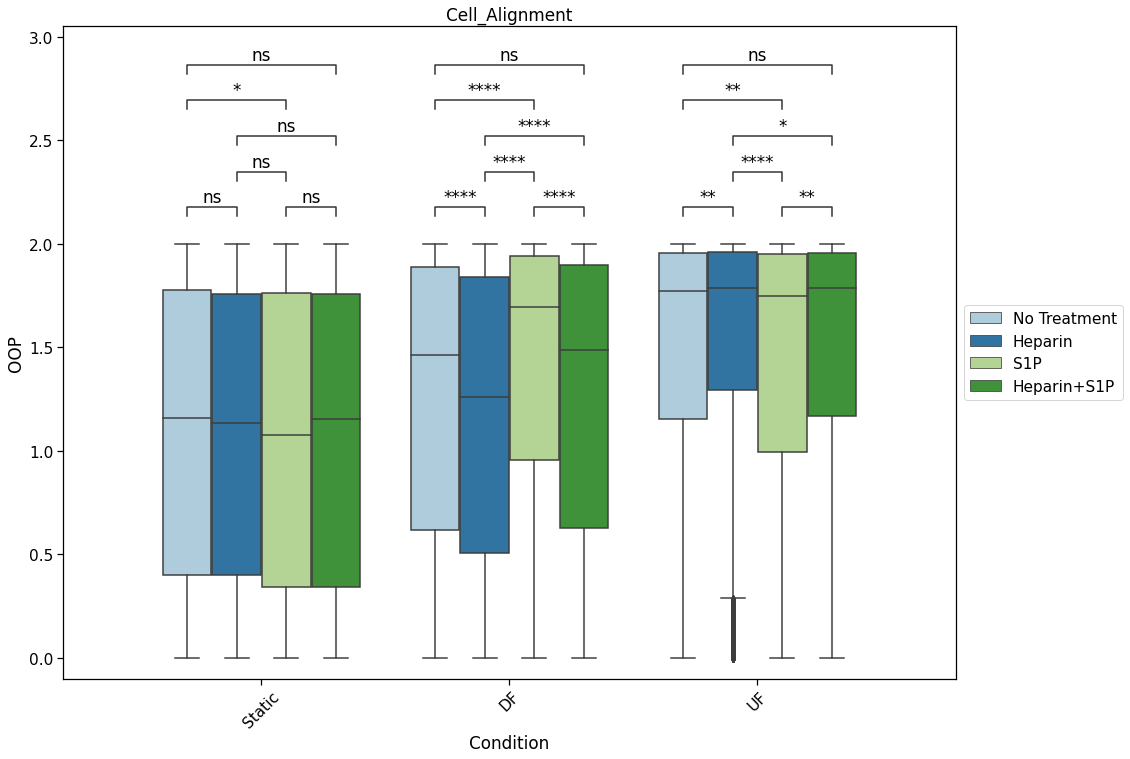

In [177]:

pairs = []
p_vals = []
for (i, j) in combinations(elong_df['treatment'].unique(), 2):
    for flow in elong_df['flow'].unique():
        subset1 = elong_df[(elong_df['treatment'] == i) & (elong_df['flow'] == flow)]['oop_bar2']
        subset2 = elong_df[(elong_df['treatment'] == j) & (elong_df['flow'] == flow)]['oop_bar2']
        pairs.append(((flow,i),(flow,j)))
        _, p_value = mannwhitneyu(subset1, subset2)
        p_vals.append(p_value)


plotting_parameters = {
    'x': 'flow',
    'y': 'oop_bar2',
    'hue': 'treatment',
    'data': elong_df,
    'order': ['Static', 'DF', 'UF'],
    'palette': 'Paired'
}

#pairs = pairs
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in p_vals]

plt.figure(figsize = [16,12])
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    #ax = get_log_ax()

    # Plot with seaborn
    ax = sns.boxplot(**plotting_parameters)
    

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(p_vals)
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()

    # Label and show
    #label_plot_for_subcats(ax)
    plt.xlabel('Condition')
    plt.ylabel('OOP')
    plt.title('Cell_Alignment')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['No Treatment', 'Heparin', 'S1P', 'Heparin+S1P']
    ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

UF_Albumin bound S1P vs. UF_Heparin S1P: Custom statistical test, P_val:2.604e-03
UF_No Treatment vs. UF_Heparin 2 UmL: Custom statistical test, P_val:3.420e-45
DF_Albumin bound S1P vs. DF_Heparin S1P: Custom statistical test, P_val:8.767e-19
Static_Albumin bound S1P vs. Static_Heparin S1P: Custom statistical test, P_val:4.673e-01
Static_No Treatment vs. Static_Heparin 2 UmL: Custom statistical test, P_val:8.021e-08
Static_Heparin 2 UmL vs. Static_Albumin bound S1P: Custom statistical test, P_val:7.334e-01
DF_No Treatment vs. DF_Heparin 2 UmL: Custom statistical test, P_val:1.162e-07
DF_Heparin 2 UmL vs. DF_Albumin bound S1P: Custom statistical test, P_val:1.797e-56
UF_Heparin 2 UmL vs. UF_Albumin bound S1P: Custom statistical test, P_val:1.473e-32
UF_Heparin 2 UmL vs. UF_Heparin S1P: Custom statistical test

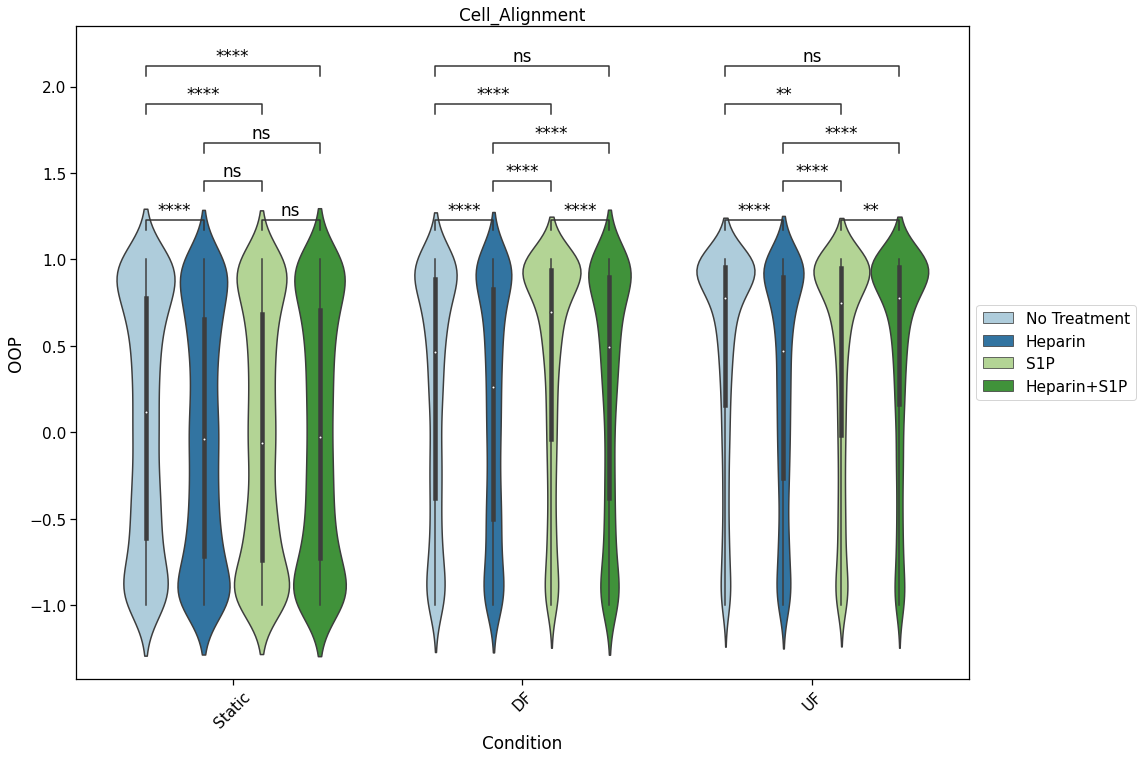

In [25]:

pairs = []
p_vals = []
for (i, j) in combinations(elong_df['treatment'].unique(), 2):
    for flow in elong_df['flow'].unique():
        subset1 = elong_df[(elong_df['treatment'] == i) & (elong_df['flow'] == flow)]['oop_bar']
        subset2 = elong_df[(elong_df['treatment'] == j) & (elong_df['flow'] == flow)]['oop_bar']
        pairs.append(((flow,i),(flow,j)))
        _, p_value = mannwhitneyu(subset1, subset2)
        p_vals.append(p_value)


plotting_parameters = {
    'x': 'flow',
    'y': 'oop_bar',
    'hue': 'treatment',
    'data': elong_df,
    'order': ['Static', 'DF', 'UF'],
    'palette': 'Paired'
}

#pairs = pairs
formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in p_vals]

plt.figure(figsize = [16,12])
with sns.plotting_context('notebook', font_scale = 1.4):
    # Create new plot
    #ax = get_log_ax()

    # Plot with seaborn
    ax = sns.violinplot(**plotting_parameters)
    

    # Add annotations
    annotator = Annotator(ax, pairs, **plotting_parameters)
    annotator.set_pvalues(p_vals)
    #annotator.set_custom_annotations(formatted_pvalues)
    annotator.annotate()

    # Label and show
    #label_plot_for_subcats(ax)
    plt.xlabel('Condition')
    plt.ylabel('OOP')
    plt.title('Cell_Alignment')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

    handles, labels = ax.get_legend_handles_labels()
    new_labels = ['No Treatment', 'Heparin', 'S1P', 'Heparin+S1P']
    ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

In [80]:
p_vals

[3.420382683531081e-45,
 1.1617426636201222e-07,
 8.021406871102294e-08,
 0.00452849197705635,
 8.537258039042386e-26,
 3.7459927557644663e-07,
 0.8049621123290193,
 0.3976295459022273,
 3.578402264696903e-05,
 1.4731706104728223e-32,
 1.7969797515647217e-56,
 0.7334046600052782,
 5.145728332914404e-44,
 6.8918225873221645e-09,
 0.28736376297964117,
 0.0026038232646496255,
 8.7669337647678e-19,
 0.4672653661305969]

In [46]:
len(elong_df)

30739

/var/folders/lf/pg548lwd6834zcdnks8dbjt80000gn/T/ipykernel_86616/1418287715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elong_df['oop_bar_1'] = elong_df['oop_bar']+1


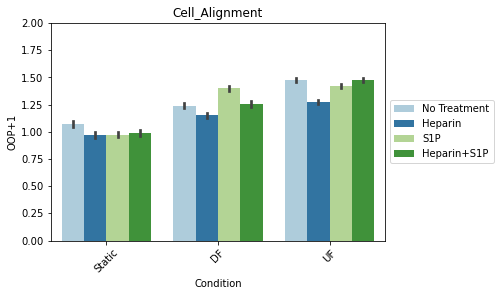

In [24]:
elong_df['oop_bar_1'] = elong_df['oop_bar']+1

plt.figure()
ax = sns.barplot(x='flow', y='oop_bar_1',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired")#,cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP+1')
plt.title('Cell_Alignment')
plt.ylim([0,2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

# Set the new labels for the legend
#new_labels = ['Heparin', 'S1P', 'Heparin+S1P']
new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']


# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

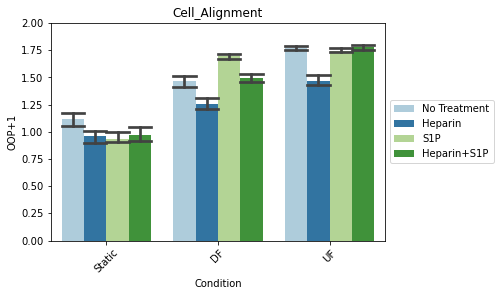

In [25]:
plt.figure()
ax = sns.barplot(x='flow', y='oop_bar_1',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired",estimator=np.median, ci=95, capsize=.2)#,cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP+1')
plt.title('Cell_Alignment')
plt.ylim([0,2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

# Set the new labels for the legend
#new_labels = ['Heparin', 'S1P', 'Heparin+S1P']
new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']


# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

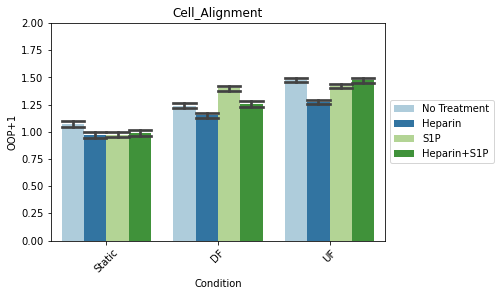

In [26]:
plt.figure()
ax = sns.barplot(x='flow', y='oop_bar_1',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired",estimator=np.mean, ci=95, capsize=.2)#,cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP+1')
plt.title('Cell_Alignment')
plt.ylim([0,2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

# Set the new labels for the legend
#new_labels = ['Heparin', 'S1P', 'Heparin+S1P']
new_labels = ['No Treatment','Heparin', 'S1P', 'Heparin+S1P']


# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
# tried to do means with SEM here but didnt work

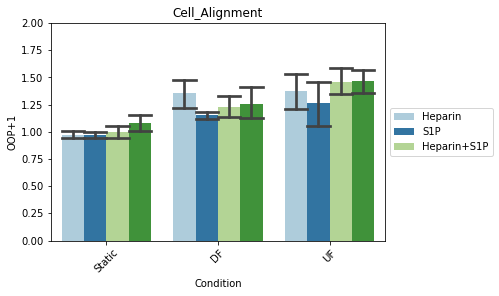

In [28]:
# Calculate mean for each replicate
replicate_means = elong_df.groupby(['flow', 'treatment', 'replicate']).agg(
    mean_oop_bar_1=pd.NamedAgg(column='oop_bar_1', aggfunc='mean')
).reset_index()

# Calculate mean and SEM for each group
grouped = replicate_means.groupby(['flow', 'treatment']).agg(
    mean_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc='mean'),
    sem_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc=lambda x: np.std(x) / np.sqrt(x.count()))
).reset_index()

plt.figure()
ax = sns.barplot(x='flow', y='mean_oop_bar_1', hue='treatment', data=replicate_means, order=['Static', 'DF', 'UF'],
                 palette="Paired",estimator=np.mean, ci=85, capsize=.2)# yerr="sem_oop_bar_1")

plt.xlabel('Condition')
plt.ylabel('OOP+1')
plt.title('Cell_Alignment')
plt.ylim([0, 2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

handles, labels = ax.get_legend_handles_labels()

new_labels = ['Heparin', 'S1P', 'Heparin+S1P']
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

In [29]:
counts = elong_df.groupby(['flow', 'treatment']).agg(
    count = pd.NamedAgg(column='length', aggfunc='count'),
    median_length=pd.NamedAgg(column='length', aggfunc='median'),
    median_area=pd.NamedAgg(column='area', aggfunc='median'),
    median_ratio = pd.NamedAgg(column='ratio', aggfunc='median'),
    median_oop_bar = pd.NamedAgg(column='oop_bar', aggfunc='median')
    
    #sem_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc=lambda x: np.std(x) / np.sqrt(x.count()))
).reset_index()

counts

,flow,treatment,count,median_length,median_area,median_ratio,median_oop_bar
0,DF,Albumin bound S1P,4027,35.249718,347.0,2.758039,0.694131
1,DF,Heparin 2 UmL,3299,35.889256,346.0,2.799502,0.259669
2,DF,Heparin S1P,2703,33.994656,331.0,2.644113,0.492710
3,DF,No Treatment,3372,36.520809,349.0,2.932075,0.463314
4,Static,Albumin bound S1P,3130,36.258684,376.0,2.621906,-0.061952
5,Static,Heparin 2 UmL,2720,34.918596,347.0,2.608734,-0.041576
6,Static,Heparin S1P,2589,34.449791,336.0,2.620379,-0.026693
7,Static,No Treatment,2572,32.031687,316.5,2.541692,0.116410
8,UF,Albumin bound S1P,4884,33.941858,317.0,2.830860,0.745831
9,UF,Heparin 2 UmL,4157,36.090302,333.0,3.002044,0.470078


In [27]:
replicate_means
grouped

NameError: name 'replicate_means' is not defined

In [30]:
# # Calculate mean for each replicate
# replicate_means = elong_df.groupby(['flow', 'treatment', 'replicate']).agg(
#     mean_oop_bar_1=pd.NamedAgg(column='oop_bar_1', aggfunc='mean')
# ).reset_index()

# # Calculate mean and SEM for each group
# grouped = replicate_means.groupby(['flow', 'treatment']).agg(
#     mean_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc='mean'),
#     sem_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc=lambda x: np.std(x) / np.sqrt(x.count()))
# ).reset_index()

# plt.figure()
# ax = sns.barplot(x='flow', y='mean_oop_bar_1', hue='treatment', data=replicate_means, order=['Static', 'DF', 'UF'],
#                  palette="Paired",estimator=np.mean, ci=85, capsize=.2)# yerr="sem_oop_bar_1")

# plt.xlabel('Condition')
# plt.ylabel('OOP+1')
# plt.title('Cell_Alignment')
# plt.ylim([0, 2])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# handles, labels = ax.get_legend_handles_labels()

# new_labels = ['Heparin', 'S1P', 'Heparin+S1P']
# ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

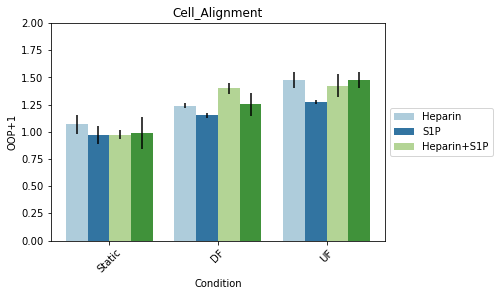

In [31]:
# Calculate mean for each replicate
replicate_means = elong_df.groupby(['flow', 'treatment', 'replicate']).agg(
    mean_oop_bar_1=pd.NamedAgg(column='oop_bar_1', aggfunc='mean')
).reset_index()

# Calculate mean and SEM for each group
grouped = replicate_means.groupby(['flow', 'treatment']).agg(
    mean_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc='mean'),
    sem_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc=lambda x: np.std(x) / np.sqrt(x.count()))
).reset_index()



plt.figure()
ax = sns.barplot(x='flow', y='oop_bar_1', hue='treatment', data=elong_df, order=['Static', 'DF', 'UF'],
                 palette="Paired",ci = None)#,estimator=np.mean, ci=85, capsize=.2)# yerr="sem_oop_bar_1")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=grouped["sem_oop_bar_1"], fmt="none", c="k")

plt.xlabel('Condition')
plt.ylabel('OOP+1')
plt.title('Cell_Alignment')
plt.ylim([0, 2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

handles, labels = ax.get_legend_handles_labels()

new_labels = ['Heparin', 'S1P', 'Heparin+S1P']
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

In [60]:
names_order = ['Heparin 2 UmL-Static',
 'Albumin bound S1P-Static',
 'Heparin S1P-Static',
 'Heparin 2 UmL-DF',
 'Albumin bound S1P-DF',
 'Heparin S1P-DF',
 'Heparin 2 UmL-UF',
 'Albumin bound S1P-UF',
 'Heparin S1P-UF']
elong_df['g_name'] = pd.Categorical(elong_df['g_name'], categories=names_order, ordered=True)
elong_df = elong_df.sort_values(by=['g_name'])

/var/folders/lf/pg548lwd6834zcdnks8dbjt80000gn/T/ipykernel_57630/2749983166.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elong_df['g_name'] = pd.Categorical(elong_df['g_name'], categories=names_order, ordered=True)


/var/folders/lf/pg548lwd6834zcdnks8dbjt80000gn/T/ipykernel_57630/189735323.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  elong_df['oop_bar_1'] = elong_df['oop_bar']+1


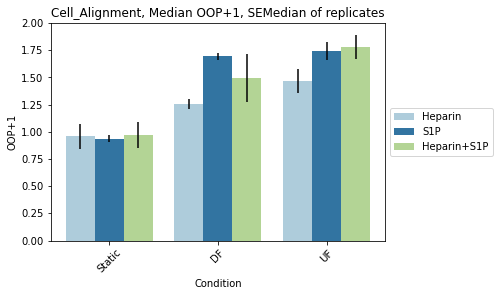

In [83]:
# grouped = elong_df.groupby(['flow', 'treatment']).agg(
#     mean_oop_bar_1=pd.NamedAgg(column='oop_bar_1', aggfunc='median'),
#     sem_oop_bar_1=pd.NamedAgg(column='oop_bar_1', aggfunc=lambda x: np.std(x) / np.sqrt(x.count()))
# ).reset_index()

elong_df['oop_bar_1'] = elong_df['oop_bar']+1

# Calculate mean for each replicate
replicate_means = elong_df.groupby(['flow', 'treatment', 'replicate']).agg(
    mean_oop_bar_1=pd.NamedAgg(column='oop_bar_1', aggfunc='median')
).reset_index()

# Calculate mean and SEM for each group
grouped = replicate_means.groupby(['flow', 'treatment']).agg(
    mean_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc='mean'),
    sem_oop_bar_1=pd.NamedAgg(column='mean_oop_bar_1', aggfunc=lambda x: np.std(x) / np.sqrt(x.count()))
).reset_index()

plt.figure()
ax = sns.barplot(x='flow', y='oop_bar_1', hue='treatment', data=elong_df, order=['Static', 'DF', 'UF'],
                 palette="Paired",ci = None,estimator=np.median)#, ci=85, capsize=.2)# yerr="sem_oop_bar_1")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=grouped["sem_oop_bar_1"], fmt="none", c="k")
plt.xlabel('Condition')
plt.ylabel('OOP+1')
plt.title('Cell_Alignment, Median OOP+1, SEMedian of replicates')
plt.ylim([0, 2])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

handles, labels = ax.get_legend_handles_labels()

new_labels = ['Heparin', 'S1P', 'Heparin+S1P']
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

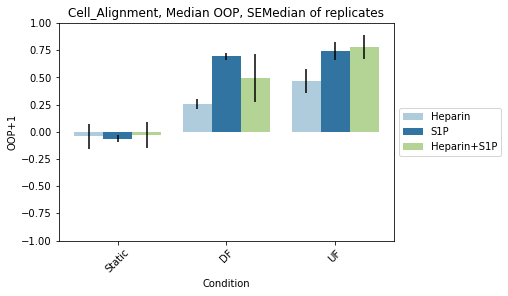

In [74]:
elong_df = master_df[master_df['elong2'] ==True]

# Calculate mean for each replicate
replicate_means = elong_df.groupby(['flow', 'treatment', 'replicate']).agg(
    mean_oop_bar=pd.NamedAgg(column='oop_bar', aggfunc='median')
).reset_index()

# Calculate mean and SEM for each group
grouped = replicate_means.groupby(['flow', 'treatment']).agg(
    mean_oop_bar=pd.NamedAgg(column='mean_oop_bar', aggfunc='mean'),
    sem_oop_bar=pd.NamedAgg(column='mean_oop_bar', aggfunc=lambda x: np.std(x) / np.sqrt(x.count()))
).reset_index()

plt.figure()
ax = sns.barplot(x='flow', y='oop_bar', hue='treatment', data=elong_df, order=['Static', 'DF', 'UF'],
                 palette="Paired",ci = None,estimator=np.median)#, ci=85, capsize=.2)# yerr="sem_oop_bar_1")

x_coords = [p.get_x() + 0.5 * p.get_width() for p in ax.patches]
y_coords = [p.get_height() for p in ax.patches]
ax.errorbar(x=x_coords, y=y_coords, yerr=grouped["sem_oop_bar"], fmt="none", c="k")
plt.xlabel('Condition')
plt.ylabel('OOP+1')
plt.title('Cell_Alignment, Median OOP, SEMedian of replicates')
plt.ylim([-1, 1])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

handles, labels = ax.get_legend_handles_labels()

new_labels = ['Heparin', 'S1P', 'Heparin+S1P']
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

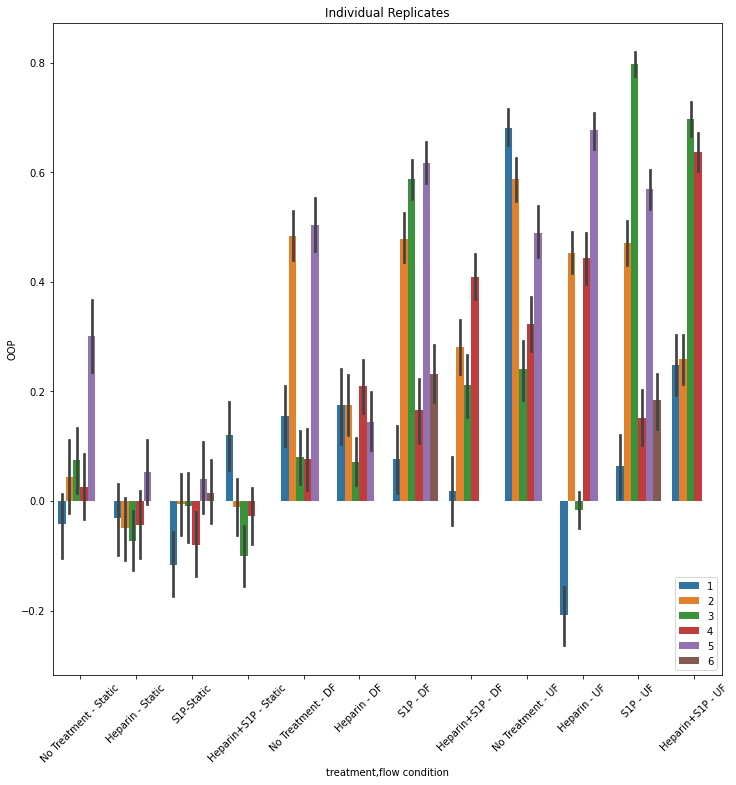

In [32]:
plt.figure(figsize = [12,12])
ax = sns.barplot(x='g_name', y='oop_bar', hue='replicate', data=elong_df,order = names_order)#,palette = "Set2")
# Customize the plot
plt.xlabel('treatment,flow condition')
plt.ylabel('OOP')
plt.title('Individual Replicates')
ax.set_xticklabels(names_simp, rotation=45);
plt.legend(loc='lower right')

In [66]:
# Define a function to calculate p-values and annotate the plot
def add_pvalue(ax, x1, x2, y, data, hue, order):
    # Get the data for each group
    group1 = data[data[hue] == order[0]]
    group2 = data[data[hue] == order[1]]
    
    # Perform the Mann-Whitney U test
    _, p_value = mannwhitneyu(group1['oop_bar'], group2['oop_bar'])
    
    # Add the p-value to the plot
    ax.annotate(f'p = {p_value:.2e}', xy=((x1 + x2) / 2, y), ha='center', fontsize=10)

ValueError: `x` and `y` must be of nonzero size.

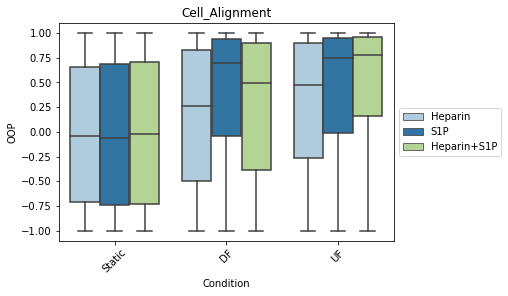

In [68]:
from scipy.stats import mannwhitneyu

plt.figure()
ax = sns.boxplot(x='flow', y='oop_bar',hue = 'treatment', data=elong_df,order = ['Static','DF','UF'],
                 palette = "Paired")#,cut = 0)
#palette("hls", 8)
# Customize the plot
plt.xlabel('Condition')
plt.ylabel('OOP')
plt.title('Cell_Alignment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
#ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


handles, labels = ax.get_legend_handles_labels()

# Set the new labels for the legend
new_labels = ['Heparin', 'S1P', 'Heparin+S1P']

# Create the legend with the handles (color information) and new labels
ax.legend(handles, new_labels, loc='center left', bbox_to_anchor=(1.0, 0.5))

# Add p-values to the plot
add_pvalue(ax, 0, 1, 1.0, elong_df, 'flow', ['Heparin', 'S1P'])  # Adjust y value for proper annotation placement
add_pvalue(ax, 1, 2, 1.0, elong_df, 'flow', ['S1P', 'Heparin+S1P'])  # Adjust y value for proper annotation placement
